In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
df = pd.read_excel("C:/Users/shubh/Desktop/Capstone-2/Final project/Dataset/Quarter_wise_net_income_and_Revenue.xlsx")

In [17]:
df

,Quarter,Revenue (US $M),Net Income (US $M)
0,2020-03-31,"$75,452","$2,535"
1,2019-12-31,"$87,437","$3,268"
2,2019-09-30,"$69,981","$2,134"
3,2019-06-30,"$63,404","$2,625"
4,2019-03-31,"$59,700","$3,561"
...,...,...,...
56,2006-03-31,"$2,279",$51
57,2005-12-31,"$2,977",$199
58,2005-09-30,"$1,858",$30
59,2005-06-30,"$1,753",$52


In [18]:
df.isnull().sum()

Quarter               0
Revenue (US $M)       0
Net Income (US $M)    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df['Revenue (US $M)'] = pd.to_numeric(df['Revenue (US $M)'].str.replace(",","").apply(lambda x: x[1:]))
df['Net Income (US $M)'] = pd.to_numeric(df['Net Income (US $M)'].str.replace(",","").apply(lambda x: x[1:]))

In [21]:
df.dtypes

Quarter               datetime64[ns]
Revenue (US $M)                int64
Net Income (US $M)             int64
dtype: object

In [22]:
df.isnull().sum()

Quarter               0
Revenue (US $M)       0
Net Income (US $M)    0
dtype: int64

In [23]:
df['Net Income (US $M)'].fillna(df['Net Income (US $M)'].median(),inplace=True)

In [24]:
df.isnull().sum()

Quarter               0
Revenue (US $M)       0
Net Income (US $M)    0
dtype: int64

In [25]:
df.sort_values("Quarter",ascending=True,inplace=True)

In [26]:
df['Quarter'].min()

Timestamp('2005-03-31 00:00:00')

In [27]:
df['Quarter'].max()

Timestamp('2020-03-31 00:00:00')

In [28]:
quarter_range = pd.date_range(start=df['Quarter'].min(),end=df['Quarter'].max(),freq='Q')
quarter_range

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
      

In [29]:
len(quarter_range)

61

In [30]:
df['Quarter'].shape

(61,)

In [31]:
np.where(df['Quarter'] == quarter_range,0,1).sum()

0

In [32]:
df_revenue = df[['Quarter','Revenue (US $M)']].set_index('Quarter')
df_revenue.head()

,Revenue (US $M)
Quarter,
2005-03-31,1902
2005-06-30,1753
2005-09-30,1858
2005-12-31,2977
2006-03-31,2279


In [33]:
df_net_income = df[['Quarter','Net Income (US $M)']].set_index('Quarter')
df_net_income.head()

,Net Income (US $M)
Quarter,
2005-03-31,78
2005-06-30,52
2005-09-30,30
2005-12-31,199
2006-03-31,51


In [34]:
import pickle

In [23]:
with open("./models/revenue_data.pkl", "wb") as file:
    pickle.dump(df_revenue,file)

In [24]:
with open("./models/income_data.pkl", "wb") as file:
    pickle.dump(df_net_income,file)

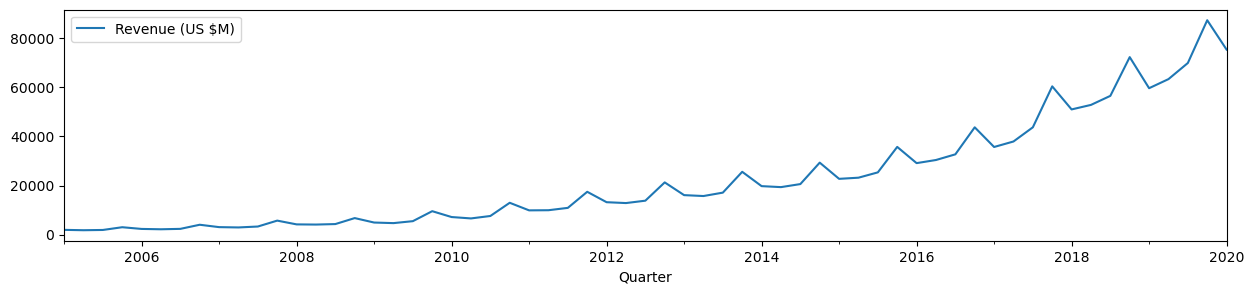

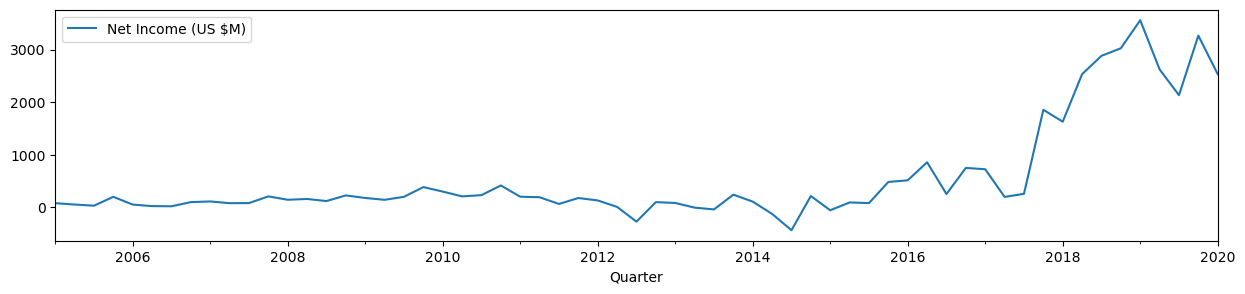

In [137]:
df_revenue.plot(figsize=(15,3))
df_net_income.plot(figsize=(15,3))
plt.show()

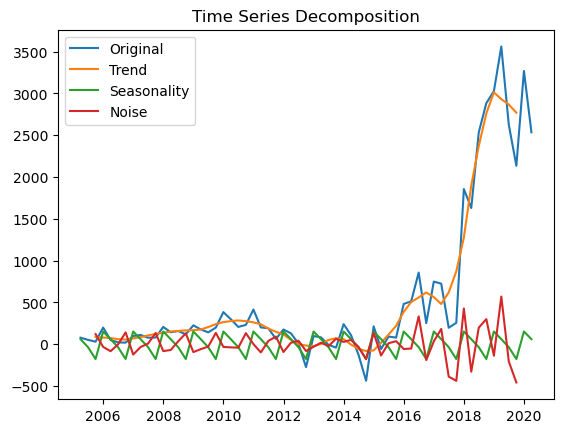

In [139]:
decom_income = seasonal_decompose(df_net_income)

original_income = decom_income.observed
trend_income = decom_income.trend
seasonality_income = decom_income.seasonal
noise_income = decom_income.resid

plt.plot(original_income,label='Original')
plt.plot(trend_income,label='Trend')
plt.plot(seasonality_income,label='Seasonality')
plt.plot(noise_income,label='Noise')
plt.title("Time Series Decomposition")
plt.legend()
plt.show()

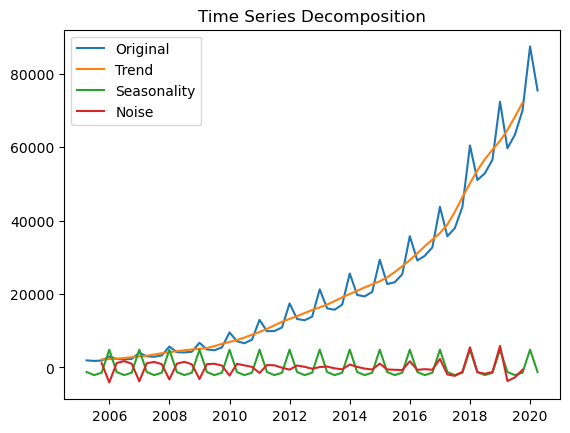

In [140]:
decom_revenue = seasonal_decompose(df_revenue)

original_revenue = decom_revenue.observed
trend_revenue = decom_revenue.trend
seasonality_revenue = decom_revenue.seasonal
noise_revenue = decom_revenue.resid

plt.plot(original_revenue,label='Original')
plt.plot(trend_revenue,label='Trend')
plt.plot(seasonality_revenue,label='Seasonality')
plt.plot(noise_revenue,label='Noise')
plt.title("Time Series Decomposition")
plt.legend()
plt.show()

In [141]:
train_revenue = df_revenue[:48]
train_net_income = df_net_income[:48]
test_revenue = df_revenue[48:]
test_net_income = df_net_income[48:]

print("Train Revenue Shape :",train_revenue.shape)
print("Test Revenue Shape :",test_revenue.shape)
print("Train Net Income Shape :",train_net_income.shape)
print("Test Net Income Shape :",test_net_income.shape)

Train Revenue Shape : (48, 1)
Test Revenue Shape : (13, 1)
Train Net Income Shape : (48, 1)
Test Net Income Shape : (13, 1)


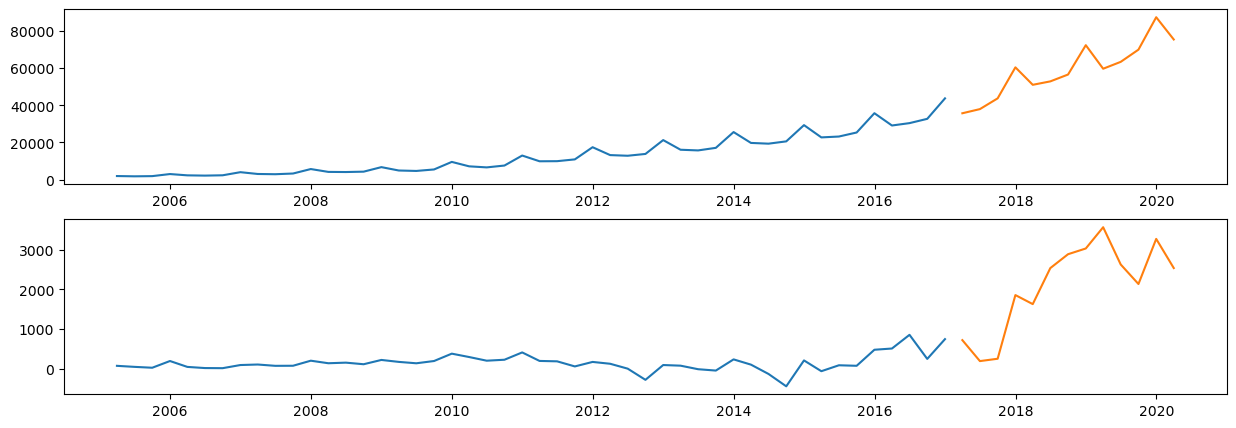

In [144]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(train_revenue,label='Train')
plt.plot(test_revenue,label='Test')

plt.subplot(2,1,2)
plt.plot(train_net_income,label='Train')
plt.plot(test_net_income,label='Test')
plt.show()

In [145]:
def eval_model(test,pred,model_name):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test,pred)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,
                       'RMSE':rmse,'MAPE':mape},index=[model_name])
    return res
    
def plot_res(train,test,fcast):
    plt.plot(train,label='Train')
    plt.plot(test,label='Test')
    plt.plot(fcast,label='Forecast')
    plt.legend()
    plt.show()

### Triple Exponential Smoothing For Revenue

In [147]:
alpha = 0.2
beta = 0.38
gamma = 0.45
tes = ExponentialSmoothing(train_revenue,trend='mul',seasonal='mul',freq='Q')
tes_m = tes.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

In [148]:
fcast_tes = tes_m.forecast(test_revenue.shape[0])
fcast_tes

2017-03-31    36324.934502
2017-06-30    37154.804995
2017-09-30    39935.726795
2017-12-31    56774.647116
2018-03-31    45402.180312
2018-06-30    46439.427323
2018-09-30    49915.274279
2018-12-31    70962.076073
2019-03-31    56747.741059
2019-06-30    58044.185951
2019-09-30    62388.613062
2019-12-31    88694.804750
2020-03-31    70928.446456
Freq: Q-DEC, dtype: float64

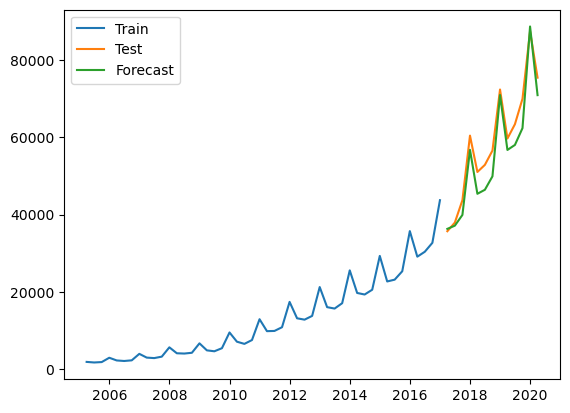

,MAE,MSE,RMSE,MAPE
"TES(alpha=0.2,beta=0.38,gamma=0.45)",3903.970448,2.045610e+07,4522.842226,0.067128


In [149]:
plot_res(train_revenue,test_revenue,fcast_tes)
tes_res = eval_model(test_revenue,fcast_tes,'TES(alpha=0.2,beta=0.38,gamma=0.45)')
tes_res

In [151]:
min_rmse_revenue = 99999999999
av_revenue = bv_revenue = gv_revenue = 0
alpha_revenue = [round(item,2) for item in list(np.linspace(start=0.02,stop=0.5,num=15))]
beta_revenue = [round(item,2) for item in list(np.linspace(start=0.02,stop=0.5,num=15))]
gamma_revenue = [round(item,2) for item in list(np.linspace(start=0.02,stop=0.5,num=15))]
c = 0

for i in alpha_revenue:
    for j in beta_revenue:
        for k in gamma_revenue:
            tes = ExponentialSmoothing(train_revenue,trend='mul',seasonal='mul',freq='Q')
            tes_model = tes.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k)
            fcast = tes_model.forecast(len(test_revenue))
            mse = mean_squared_error(test_revenue,fcast)
            rmse = np.sqrt(mse)
            c = c+1
            print(f"For Iteration {c} - alpha:{i}, beta:{j}, gamma:{k} and RMSE:{rmse}")
            if rmse<min_rmse_revenue:
                min_rmse_revenue = rmse
                av_revenue = i
                bv_revenue = j
                gv_revenue = k

For Iteration 1 - alpha:0.02, beta:0.02, gamma:0.02 and RMSE:497657.5197031405
For Iteration 2 - alpha:0.02, beta:0.02, gamma:0.05 and RMSE:415671.1458613063
For Iteration 3 - alpha:0.02, beta:0.02, gamma:0.09 and RMSE:331551.17116787797
For Iteration 4 - alpha:0.02, beta:0.02, gamma:0.12 and RMSE:283115.92911948974
For Iteration 5 - alpha:0.02, beta:0.02, gamma:0.16 and RMSE:233250.97527740413
For Iteration 6 - alpha:0.02, beta:0.02, gamma:0.19 and RMSE:204356.22902720625
For Iteration 7 - alpha:0.02, beta:0.02, gamma:0.23 and RMSE:174319.344127753
For Iteration 8 - alpha:0.02, beta:0.02, gamma:0.26 and RMSE:156680.01661251107
For Iteration 9 - alpha:0.02, beta:0.02, gamma:0.29 and RMSE:142251.5853445168
For Iteration 10 - alpha:0.02, beta:0.02, gamma:0.33 and RMSE:126860.9888235391
For Iteration 11 - alpha:0.02, beta:0.02, gamma:0.36 and RMSE:117544.71550681321
For Iteration 12 - alpha:0.02, beta:0.02, gamma:0.4 and RMSE:107369.95143047531
For Iteration 13 - alpha:0.02, beta:0.02, ga

For Iteration 125 - alpha:0.02, beta:0.29, gamma:0.16 and RMSE:5507.01702175886
For Iteration 126 - alpha:0.02, beta:0.29, gamma:0.19 and RMSE:5666.882994614566
For Iteration 127 - alpha:0.02, beta:0.29, gamma:0.23 and RMSE:6400.98879182941
For Iteration 128 - alpha:0.02, beta:0.29, gamma:0.26 and RMSE:7161.450076791148
For Iteration 129 - alpha:0.02, beta:0.29, gamma:0.29 and RMSE:7984.744759707867
For Iteration 130 - alpha:0.02, beta:0.29, gamma:0.33 and RMSE:9078.918950808767
For Iteration 131 - alpha:0.02, beta:0.29, gamma:0.36 and RMSE:9858.947311118838
For Iteration 132 - alpha:0.02, beta:0.29, gamma:0.4 and RMSE:10823.756839895657
For Iteration 133 - alpha:0.02, beta:0.29, gamma:0.43 and RMSE:11489.347278479285
For Iteration 134 - alpha:0.02, beta:0.29, gamma:0.47 and RMSE:12306.337621688952
For Iteration 135 - alpha:0.02, beta:0.29, gamma:0.5 and RMSE:12873.748891900346
For Iteration 136 - alpha:0.02, beta:0.33, gamma:0.02 and RMSE:13529.061303340985
For Iteration 137 - alpha:0

For Iteration 237 - alpha:0.05, beta:0.02, gamma:0.4 and RMSE:72047.94561640086
For Iteration 238 - alpha:0.05, beta:0.02, gamma:0.43 and RMSE:69621.84161367324
For Iteration 239 - alpha:0.05, beta:0.02, gamma:0.47 and RMSE:66798.42229840557
For Iteration 240 - alpha:0.05, beta:0.02, gamma:0.5 and RMSE:64943.43649934424
For Iteration 241 - alpha:0.05, beta:0.05, gamma:0.02 and RMSE:65125.76270287238
For Iteration 242 - alpha:0.05, beta:0.05, gamma:0.05 and RMSE:60671.67008669422
For Iteration 243 - alpha:0.05, beta:0.05, gamma:0.09 and RMSE:56042.25935506616
For Iteration 244 - alpha:0.05, beta:0.05, gamma:0.12 and RMSE:53337.37498701356
For Iteration 245 - alpha:0.05, beta:0.05, gamma:0.16 and RMSE:50500.99803739166
For Iteration 246 - alpha:0.05, beta:0.05, gamma:0.19 and RMSE:48815.605917883135
For Iteration 247 - alpha:0.05, beta:0.05, gamma:0.23 and RMSE:47003.77661181877
For Iteration 248 - alpha:0.05, beta:0.05, gamma:0.26 and RMSE:45892.25511658668
For Iteration 249 - alpha:0.0

For Iteration 340 - alpha:0.05, beta:0.26, gamma:0.33 and RMSE:5296.849384954126
For Iteration 341 - alpha:0.05, beta:0.26, gamma:0.36 and RMSE:4784.424356269384
For Iteration 342 - alpha:0.05, beta:0.26, gamma:0.4 and RMSE:4425.87119023484
For Iteration 343 - alpha:0.05, beta:0.26, gamma:0.43 and RMSE:4212.899379669058
For Iteration 344 - alpha:0.05, beta:0.26, gamma:0.47 and RMSE:3939.0264975766313
For Iteration 345 - alpha:0.05, beta:0.26, gamma:0.5 and RMSE:3749.102099367326
For Iteration 346 - alpha:0.05, beta:0.29, gamma:0.02 and RMSE:13763.0311351585
For Iteration 347 - alpha:0.05, beta:0.29, gamma:0.05 and RMSE:6266.919375577787
For Iteration 348 - alpha:0.05, beta:0.29, gamma:0.09 and RMSE:6071.950838811122
For Iteration 349 - alpha:0.05, beta:0.29, gamma:0.12 and RMSE:5982.71449542313
For Iteration 350 - alpha:0.05, beta:0.29, gamma:0.16 and RMSE:5898.413577733469
For Iteration 351 - alpha:0.05, beta:0.29, gamma:0.19 and RMSE:5840.514586978939
For Iteration 352 - alpha:0.05, 

For Iteration 444 - alpha:0.05, beta:0.5, gamma:0.29 and RMSE:9386.691442893109
For Iteration 445 - alpha:0.05, beta:0.5, gamma:0.33 and RMSE:9125.757846368002
For Iteration 446 - alpha:0.05, beta:0.5, gamma:0.36 and RMSE:8893.198974390078
For Iteration 447 - alpha:0.05, beta:0.5, gamma:0.4 and RMSE:8547.00297225578
For Iteration 448 - alpha:0.05, beta:0.5, gamma:0.43 and RMSE:8267.61607622759
For Iteration 449 - alpha:0.05, beta:0.5, gamma:0.47 and RMSE:7877.569326181125
For Iteration 450 - alpha:0.05, beta:0.5, gamma:0.5 and RMSE:7601.459806124865
For Iteration 451 - alpha:0.09, beta:0.02, gamma:0.02 and RMSE:71815.98165291348
For Iteration 452 - alpha:0.09, beta:0.02, gamma:0.05 and RMSE:68594.46143074041
For Iteration 453 - alpha:0.09, beta:0.02, gamma:0.09 and RMSE:64960.84901870208
For Iteration 454 - alpha:0.09, beta:0.02, gamma:0.12 and RMSE:62639.47395658305
For Iteration 455 - alpha:0.09, beta:0.02, gamma:0.16 and RMSE:59975.12357314104
For Iteration 456 - alpha:0.09, beta:0.

For Iteration 562 - alpha:0.09, beta:0.26, gamma:0.23 and RMSE:7963.136930685355
For Iteration 563 - alpha:0.09, beta:0.26, gamma:0.26 and RMSE:7791.746733432328
For Iteration 564 - alpha:0.09, beta:0.26, gamma:0.29 and RMSE:7498.707775824102
For Iteration 565 - alpha:0.09, beta:0.26, gamma:0.33 and RMSE:7285.987607484239
For Iteration 566 - alpha:0.09, beta:0.26, gamma:0.36 and RMSE:7079.479654992723
For Iteration 567 - alpha:0.09, beta:0.26, gamma:0.4 and RMSE:6758.121171072625
For Iteration 568 - alpha:0.09, beta:0.26, gamma:0.43 and RMSE:6502.345261229533
For Iteration 569 - alpha:0.09, beta:0.26, gamma:0.47 and RMSE:6159.03483738428
For Iteration 570 - alpha:0.09, beta:0.26, gamma:0.5 and RMSE:5898.915677631513
For Iteration 571 - alpha:0.09, beta:0.29, gamma:0.02 and RMSE:9777.893915718485
For Iteration 572 - alpha:0.09, beta:0.29, gamma:0.05 and RMSE:9774.158103471185
For Iteration 573 - alpha:0.09, beta:0.29, gamma:0.09 and RMSE:9691.522708001645
For Iteration 574 - alpha:0.09,

For Iteration 676 - alpha:0.12, beta:0.02, gamma:0.02 and RMSE:49245.63575728653
For Iteration 677 - alpha:0.12, beta:0.02, gamma:0.05 and RMSE:48229.70435336497
For Iteration 678 - alpha:0.12, beta:0.02, gamma:0.09 and RMSE:47028.333423970325
For Iteration 679 - alpha:0.12, beta:0.02, gamma:0.12 and RMSE:46225.47830090033
For Iteration 680 - alpha:0.12, beta:0.02, gamma:0.16 and RMSE:45266.823101777816
For Iteration 681 - alpha:0.12, beta:0.02, gamma:0.19 and RMSE:44621.64585502188
For Iteration 682 - alpha:0.12, beta:0.02, gamma:0.23 and RMSE:43848.427704509406
For Iteration 683 - alpha:0.12, beta:0.02, gamma:0.26 and RMSE:43327.73944749696
For Iteration 684 - alpha:0.12, beta:0.02, gamma:0.29 and RMSE:42853.66159129444
For Iteration 685 - alpha:0.12, beta:0.02, gamma:0.33 and RMSE:42288.82683526072
For Iteration 686 - alpha:0.12, beta:0.02, gamma:0.36 and RMSE:41912.31257401509
For Iteration 687 - alpha:0.12, beta:0.02, gamma:0.4 and RMSE:41468.82124092872
For Iteration 688 - alpha:

For Iteration 794 - alpha:0.12, beta:0.26, gamma:0.47 and RMSE:6503.010170411808
For Iteration 795 - alpha:0.12, beta:0.26, gamma:0.5 and RMSE:6233.448872617552
For Iteration 796 - alpha:0.12, beta:0.29, gamma:0.02 and RMSE:12951.403613591967
For Iteration 797 - alpha:0.12, beta:0.29, gamma:0.05 and RMSE:12424.74793850383
For Iteration 798 - alpha:0.12, beta:0.29, gamma:0.09 and RMSE:11741.691299277576
For Iteration 799 - alpha:0.12, beta:0.29, gamma:0.12 and RMSE:11246.351761243992
For Iteration 800 - alpha:0.12, beta:0.29, gamma:0.16 and RMSE:10611.433269253188
For Iteration 801 - alpha:0.12, beta:0.29, gamma:0.19 and RMSE:10155.812287011555
For Iteration 802 - alpha:0.12, beta:0.29, gamma:0.23 and RMSE:9577.015607863616
For Iteration 803 - alpha:0.12, beta:0.29, gamma:0.26 and RMSE:9164.808820301212
For Iteration 804 - alpha:0.12, beta:0.29, gamma:0.29 and RMSE:8771.328445370524
For Iteration 805 - alpha:0.12, beta:0.29, gamma:0.33 and RMSE:8275.261703659744
For Iteration 806 - alph

For Iteration 904 - alpha:0.16, beta:0.02, gamma:0.12 and RMSE:35456.47773734499
For Iteration 905 - alpha:0.16, beta:0.02, gamma:0.16 and RMSE:35202.54675070228
For Iteration 906 - alpha:0.16, beta:0.02, gamma:0.19 and RMSE:35037.08010352343
For Iteration 907 - alpha:0.16, beta:0.02, gamma:0.23 and RMSE:25354.164474563422
For Iteration 908 - alpha:0.16, beta:0.02, gamma:0.26 and RMSE:34731.37562419486
For Iteration 909 - alpha:0.16, beta:0.02, gamma:0.29 and RMSE:34633.31806147387
For Iteration 910 - alpha:0.16, beta:0.02, gamma:0.33 and RMSE:34531.60571418637
For Iteration 911 - alpha:0.16, beta:0.02, gamma:0.36 and RMSE:34476.08347185011
For Iteration 912 - alpha:0.16, beta:0.02, gamma:0.4 and RMSE:34428.18515182479
For Iteration 913 - alpha:0.16, beta:0.02, gamma:0.43 and RMSE:34410.76837404067
For Iteration 914 - alpha:0.16, beta:0.02, gamma:0.47 and RMSE:34410.58651963029
For Iteration 915 - alpha:0.16, beta:0.02, gamma:0.5 and RMSE:34426.60039866697
For Iteration 916 - alpha:0.1

For Iteration 1016 - alpha:0.16, beta:0.26, gamma:0.36 and RMSE:7037.673544469082
For Iteration 1017 - alpha:0.16, beta:0.26, gamma:0.4 and RMSE:6678.326662862863
For Iteration 1018 - alpha:0.16, beta:0.26, gamma:0.43 and RMSE:6426.57724796033
For Iteration 1019 - alpha:0.16, beta:0.26, gamma:0.47 and RMSE:6112.340460184513
For Iteration 1020 - alpha:0.16, beta:0.26, gamma:0.5 and RMSE:5891.258868666618
For Iteration 1021 - alpha:0.16, beta:0.29, gamma:0.02 and RMSE:11518.435801357311
For Iteration 1022 - alpha:0.16, beta:0.29, gamma:0.05 and RMSE:10975.15675872645
For Iteration 1023 - alpha:0.16, beta:0.29, gamma:0.09 and RMSE:10300.020329580635
For Iteration 1024 - alpha:0.16, beta:0.29, gamma:0.12 and RMSE:9828.353270105768
For Iteration 1025 - alpha:0.16, beta:0.29, gamma:0.16 and RMSE:9242.994810237582
For Iteration 1026 - alpha:0.16, beta:0.29, gamma:0.19 and RMSE:8834.99488909038
For Iteration 1027 - alpha:0.16, beta:0.29, gamma:0.23 and RMSE:8330.087950384104
For Iteration 1028

For Iteration 1130 - alpha:0.19, beta:0.02, gamma:0.16 and RMSE:30829.770021990582
For Iteration 1131 - alpha:0.19, beta:0.02, gamma:0.19 and RMSE:30800.80108072074
For Iteration 1132 - alpha:0.19, beta:0.02, gamma:0.23 and RMSE:30787.44199749531
For Iteration 1133 - alpha:0.19, beta:0.02, gamma:0.26 and RMSE:30795.23657966193
For Iteration 1134 - alpha:0.19, beta:0.02, gamma:0.29 and RMSE:30817.267284725218
For Iteration 1135 - alpha:0.19, beta:0.02, gamma:0.33 and RMSE:30867.171751087382
For Iteration 1136 - alpha:0.19, beta:0.02, gamma:0.36 and RMSE:30918.82047820807
For Iteration 1137 - alpha:0.19, beta:0.02, gamma:0.4 and RMSE:31005.005200995496
For Iteration 1138 - alpha:0.19, beta:0.02, gamma:0.43 and RMSE:31081.58138256802
For Iteration 1139 - alpha:0.19, beta:0.02, gamma:0.47 and RMSE:31198.15115607293
For Iteration 1140 - alpha:0.19, beta:0.02, gamma:0.5 and RMSE:31295.498934019703
For Iteration 1141 - alpha:0.19, beta:0.05, gamma:0.02 and RMSE:8752.408704865267
For Iteration

For Iteration 1230 - alpha:0.19, beta:0.23, gamma:0.5 and RMSE:5520.893627483665
For Iteration 1231 - alpha:0.19, beta:0.26, gamma:0.02 and RMSE:10232.589459178738
For Iteration 1232 - alpha:0.19, beta:0.26, gamma:0.05 and RMSE:9781.118183660374
For Iteration 1233 - alpha:0.19, beta:0.26, gamma:0.09 and RMSE:9219.624858648727
For Iteration 1234 - alpha:0.19, beta:0.26, gamma:0.12 and RMSE:8826.831829250365
For Iteration 1235 - alpha:0.19, beta:0.26, gamma:0.16 and RMSE:8338.624389564115
For Iteration 1236 - alpha:0.19, beta:0.26, gamma:0.19 and RMSE:7979.920506359648
For Iteration 1237 - alpha:0.19, beta:0.26, gamma:0.23 and RMSE:7575.6865585846535
For Iteration 1238 - alpha:0.19, beta:0.26, gamma:0.26 and RMSE:7282.054853801779
For Iteration 1239 - alpha:0.19, beta:0.26, gamma:0.29 and RMSE:6997.1820149201685
For Iteration 1240 - alpha:0.19, beta:0.26, gamma:0.33 and RMSE:6667.744582301926
For Iteration 1241 - alpha:0.19, beta:0.26, gamma:0.36 and RMSE:6432.261810484737
For Iteration 

For Iteration 1331 - alpha:0.19, beta:0.47, gamma:0.36 and RMSE:4050.5967033827756
For Iteration 1332 - alpha:0.19, beta:0.47, gamma:0.4 and RMSE:3935.502546331356
For Iteration 1333 - alpha:0.19, beta:0.47, gamma:0.43 and RMSE:3861.7349575454373
For Iteration 1334 - alpha:0.19, beta:0.47, gamma:0.47 and RMSE:3777.7869242651986
For Iteration 1335 - alpha:0.19, beta:0.47, gamma:0.5 and RMSE:3723.906236463299
For Iteration 1336 - alpha:0.19, beta:0.5, gamma:0.02 and RMSE:6638.337818667979
For Iteration 1337 - alpha:0.19, beta:0.5, gamma:0.05 and RMSE:6191.665858631573
For Iteration 1338 - alpha:0.19, beta:0.5, gamma:0.09 and RMSE:5681.540855925329
For Iteration 1339 - alpha:0.19, beta:0.5, gamma:0.12 and RMSE:5354.5981530497775
For Iteration 1340 - alpha:0.19, beta:0.5, gamma:0.16 and RMSE:4981.971164673369
For Iteration 1341 - alpha:0.19, beta:0.5, gamma:0.19 and RMSE:4743.639366985501
For Iteration 1342 - alpha:0.19, beta:0.5, gamma:0.23 and RMSE:4472.875205942496
For Iteration 1343 - 

For Iteration 1431 - alpha:0.23, beta:0.19, gamma:0.19 and RMSE:7366.775360569953
For Iteration 1432 - alpha:0.23, beta:0.19, gamma:0.23 and RMSE:6947.811968884296
For Iteration 1433 - alpha:0.23, beta:0.19, gamma:0.26 and RMSE:6732.6313934873
For Iteration 1434 - alpha:0.23, beta:0.19, gamma:0.29 and RMSE:6486.380446003381
For Iteration 1435 - alpha:0.23, beta:0.19, gamma:0.33 and RMSE:6180.236350680367
For Iteration 1436 - alpha:0.23, beta:0.19, gamma:0.36 and RMSE:5965.2179290053755
For Iteration 1437 - alpha:0.23, beta:0.19, gamma:0.4 and RMSE:5700.2664591004395
For Iteration 1438 - alpha:0.23, beta:0.19, gamma:0.43 and RMSE:5514.084420472331
For Iteration 1439 - alpha:0.23, beta:0.19, gamma:0.47 and RMSE:5281.949074772453
For Iteration 1440 - alpha:0.23, beta:0.19, gamma:0.5 and RMSE:5118.848887809826
For Iteration 1441 - alpha:0.23, beta:0.23, gamma:0.02 and RMSE:9224.322823096216
For Iteration 1442 - alpha:0.23, beta:0.23, gamma:0.05 and RMSE:8835.645411260473
For Iteration 1443

For Iteration 1532 - alpha:0.23, beta:0.43, gamma:0.05 and RMSE:6174.697306537772
For Iteration 1533 - alpha:0.23, beta:0.43, gamma:0.09 and RMSE:5725.492659187896
For Iteration 1534 - alpha:0.23, beta:0.43, gamma:0.12 and RMSE:5434.920374154037
For Iteration 1535 - alpha:0.23, beta:0.43, gamma:0.16 and RMSE:4460.456739019839
For Iteration 1536 - alpha:0.23, beta:0.43, gamma:0.19 and RMSE:4882.187551664626
For Iteration 1537 - alpha:0.23, beta:0.43, gamma:0.23 and RMSE:4631.4618216570625
For Iteration 1538 - alpha:0.23, beta:0.43, gamma:0.26 and RMSE:4403.080502438574
For Iteration 1539 - alpha:0.23, beta:0.43, gamma:0.29 and RMSE:4283.407403458817
For Iteration 1540 - alpha:0.23, beta:0.43, gamma:0.33 and RMSE:4155.312201483986
For Iteration 1541 - alpha:0.23, beta:0.43, gamma:0.36 and RMSE:4061.457295075608
For Iteration 1542 - alpha:0.23, beta:0.43, gamma:0.4 and RMSE:3951.4277660398175
For Iteration 1543 - alpha:0.23, beta:0.43, gamma:0.43 and RMSE:3881.0031427421836
For Iteration 

For Iteration 1635 - alpha:0.26, beta:0.12, gamma:0.5 and RMSE:3970.4700133711494
For Iteration 1636 - alpha:0.26, beta:0.16, gamma:0.02 and RMSE:8704.102288289692
For Iteration 1637 - alpha:0.26, beta:0.16, gamma:0.05 and RMSE:8337.827758113426
For Iteration 1638 - alpha:0.26, beta:0.16, gamma:0.09 and RMSE:7881.907479795597
For Iteration 1639 - alpha:0.26, beta:0.16, gamma:0.12 and RMSE:7561.971800812903
For Iteration 1640 - alpha:0.26, beta:0.16, gamma:0.16 and RMSE:7162.290597608728
For Iteration 1641 - alpha:0.26, beta:0.16, gamma:0.19 and RMSE:6881.5278928847265
For Iteration 1642 - alpha:0.26, beta:0.16, gamma:0.23 and RMSE:6531.208826162604
For Iteration 1643 - alpha:0.26, beta:0.16, gamma:0.26 and RMSE:6246.126547233414
For Iteration 1644 - alpha:0.26, beta:0.16, gamma:0.29 and RMSE:6034.4570108958205
For Iteration 1645 - alpha:0.26, beta:0.16, gamma:0.33 and RMSE:5767.009127003578
For Iteration 1646 - alpha:0.26, beta:0.16, gamma:0.36 and RMSE:5566.29323334861
For Iteration 1

For Iteration 1739 - alpha:0.26, beta:0.36, gamma:0.47 and RMSE:4206.217795447969
For Iteration 1740 - alpha:0.26, beta:0.36, gamma:0.5 and RMSE:4157.2218880176
For Iteration 1741 - alpha:0.26, beta:0.4, gamma:0.02 and RMSE:6636.170463198084
For Iteration 1742 - alpha:0.26, beta:0.4, gamma:0.05 and RMSE:6261.257573559606
For Iteration 1743 - alpha:0.26, beta:0.4, gamma:0.09 and RMSE:5826.460952883435
For Iteration 1744 - alpha:0.26, beta:0.4, gamma:0.12 and RMSE:5542.208461556649
For Iteration 1745 - alpha:0.26, beta:0.4, gamma:0.16 and RMSE:5210.881591104025
For Iteration 1746 - alpha:0.26, beta:0.4, gamma:0.19 and RMSE:4993.963143647696
For Iteration 1747 - alpha:0.26, beta:0.4, gamma:0.23 and RMSE:4742.244906657503
For Iteration 1748 - alpha:0.26, beta:0.4, gamma:0.26 and RMSE:4465.257798167072
For Iteration 1749 - alpha:0.26, beta:0.4, gamma:0.29 and RMSE:4419.434844644184
For Iteration 1750 - alpha:0.26, beta:0.4, gamma:0.33 and RMSE:4265.761935635893
For Iteration 1751 - alpha:0.

For Iteration 1862 - alpha:0.29, beta:0.16, gamma:0.05 and RMSE:8143.7606341810715
For Iteration 1863 - alpha:0.29, beta:0.16, gamma:0.09 and RMSE:7694.478830990739
For Iteration 1864 - alpha:0.29, beta:0.16, gamma:0.12 and RMSE:7381.511345705928
For Iteration 1865 - alpha:0.29, beta:0.16, gamma:0.16 and RMSE:6993.366444654922
For Iteration 1866 - alpha:0.29, beta:0.16, gamma:0.19 and RMSE:6722.743604479375
For Iteration 1867 - alpha:0.29, beta:0.16, gamma:0.23 and RMSE:6387.730219948508
For Iteration 1868 - alpha:0.29, beta:0.16, gamma:0.26 and RMSE:6131.5871010600185
For Iteration 1869 - alpha:0.29, beta:0.16, gamma:0.29 and RMSE:5920.928658071286
For Iteration 1870 - alpha:0.29, beta:0.16, gamma:0.33 and RMSE:5669.2872604805825
For Iteration 1871 - alpha:0.29, beta:0.16, gamma:0.36 and RMSE:5484.666733078316
For Iteration 1872 - alpha:0.29, beta:0.16, gamma:0.4 and RMSE:5257.468444568378
For Iteration 1873 - alpha:0.29, beta:0.16, gamma:0.43 and RMSE:5100.483015068808
For Iteration 

For Iteration 1970 - alpha:0.29, beta:0.4, gamma:0.16 and RMSE:5232.574190268641
For Iteration 1971 - alpha:0.29, beta:0.4, gamma:0.19 and RMSE:5007.6531680622065
For Iteration 1972 - alpha:0.29, beta:0.4, gamma:0.23 and RMSE:4746.765765795627
For Iteration 1973 - alpha:0.29, beta:0.4, gamma:0.26 and RMSE:4483.14988598957
For Iteration 1974 - alpha:0.29, beta:0.4, gamma:0.29 and RMSE:4400.092902231175
For Iteration 1975 - alpha:0.29, beta:0.4, gamma:0.33 and RMSE:4262.5272184489595
For Iteration 1976 - alpha:0.29, beta:0.4, gamma:0.36 and RMSE:4168.707380922563
For Iteration 1977 - alpha:0.29, beta:0.4, gamma:0.4 and RMSE:4067.490915357206
For Iteration 1978 - alpha:0.29, beta:0.4, gamma:0.43 and RMSE:4008.228878724281
For Iteration 1979 - alpha:0.29, beta:0.4, gamma:0.47 and RMSE:3951.999491670419
For Iteration 1980 - alpha:0.29, beta:0.4, gamma:0.5 and RMSE:3924.690110587403
For Iteration 1981 - alpha:0.29, beta:0.43, gamma:0.02 and RMSE:6613.645743540857
For Iteration 1982 - alpha:0

For Iteration 2071 - alpha:0.33, beta:0.12, gamma:0.02 and RMSE:7447.771144443473
For Iteration 2072 - alpha:0.33, beta:0.12, gamma:0.05 and RMSE:7499.815086879358
For Iteration 2073 - alpha:0.33, beta:0.12, gamma:0.09 and RMSE:7043.555985793887
For Iteration 2074 - alpha:0.33, beta:0.12, gamma:0.12 and RMSE:6727.189993602561
For Iteration 2075 - alpha:0.33, beta:0.12, gamma:0.16 and RMSE:5929.480852132818
For Iteration 2076 - alpha:0.33, beta:0.12, gamma:0.19 and RMSE:6064.4874816807815
For Iteration 2077 - alpha:0.33, beta:0.12, gamma:0.23 and RMSE:5728.81865080613
For Iteration 2078 - alpha:0.33, beta:0.12, gamma:0.26 and RMSE:5496.117310686628
For Iteration 2079 - alpha:0.33, beta:0.12, gamma:0.29 and RMSE:5279.017943560103
For Iteration 2080 - alpha:0.33, beta:0.12, gamma:0.33 and RMSE:5012.712597311299
For Iteration 2081 - alpha:0.33, beta:0.12, gamma:0.36 and RMSE:4829.467991507715
For Iteration 2082 - alpha:0.33, beta:0.12, gamma:0.4 and RMSE:4605.692782339704
For Iteration 208

For Iteration 2179 - alpha:0.33, beta:0.36, gamma:0.12 and RMSE:4441.334734179918
For Iteration 2180 - alpha:0.33, beta:0.36, gamma:0.16 and RMSE:5558.90782004468
For Iteration 2181 - alpha:0.33, beta:0.36, gamma:0.19 and RMSE:5327.247965627093
For Iteration 2182 - alpha:0.33, beta:0.36, gamma:0.23 and RMSE:4878.2499136742745
For Iteration 2183 - alpha:0.33, beta:0.36, gamma:0.26 and RMSE:4796.980957146796
For Iteration 2184 - alpha:0.33, beta:0.36, gamma:0.29 and RMSE:4700.99388850048
For Iteration 2185 - alpha:0.33, beta:0.36, gamma:0.33 and RMSE:4568.4910570304555
For Iteration 2186 - alpha:0.33, beta:0.36, gamma:0.36 and RMSE:4476.14469678476
For Iteration 2187 - alpha:0.33, beta:0.36, gamma:0.4 and RMSE:4378.132890194121
For Iteration 2188 - alpha:0.33, beta:0.36, gamma:0.43 and RMSE:4324.119059575626
For Iteration 2189 - alpha:0.33, beta:0.36, gamma:0.47 and RMSE:4276.860892543916
For Iteration 2190 - alpha:0.33, beta:0.36, gamma:0.5 and RMSE:4257.120672620723
For Iteration 2191 

For Iteration 2303 - alpha:0.36, beta:0.12, gamma:0.26 and RMSE:5502.80711976044
For Iteration 2304 - alpha:0.36, beta:0.12, gamma:0.29 and RMSE:5291.178633314544
For Iteration 2305 - alpha:0.36, beta:0.12, gamma:0.33 and RMSE:5033.661992491419
For Iteration 2306 - alpha:0.36, beta:0.12, gamma:0.36 and RMSE:4858.014159390944
For Iteration 2307 - alpha:0.36, beta:0.12, gamma:0.4 and RMSE:4645.475938935175
For Iteration 2308 - alpha:0.36, beta:0.12, gamma:0.43 and RMSE:4501.053967973325
For Iteration 2309 - alpha:0.36, beta:0.12, gamma:0.47 and RMSE:4326.4817237091975
For Iteration 2310 - alpha:0.36, beta:0.12, gamma:0.5 and RMSE:4207.66263116506
For Iteration 2311 - alpha:0.36, beta:0.16, gamma:0.02 and RMSE:8290.938660331018
For Iteration 2312 - alpha:0.36, beta:0.16, gamma:0.05 and RMSE:7923.753999865817
For Iteration 2313 - alpha:0.36, beta:0.16, gamma:0.09 and RMSE:7475.67139416315
For Iteration 2314 - alpha:0.36, beta:0.16, gamma:0.12 and RMSE:7167.5178419276435
For Iteration 2315 

For Iteration 2410 - alpha:0.36, beta:0.36, gamma:0.33 and RMSE:4694.347059911321
For Iteration 2411 - alpha:0.36, beta:0.36, gamma:0.36 and RMSE:4603.481939530317
For Iteration 2412 - alpha:0.36, beta:0.36, gamma:0.4 and RMSE:4511.087231541555
For Iteration 2413 - alpha:0.36, beta:0.36, gamma:0.43 and RMSE:4464.400589778041
For Iteration 2414 - alpha:0.36, beta:0.36, gamma:0.47 and RMSE:4429.098649869456
For Iteration 2415 - alpha:0.36, beta:0.36, gamma:0.5 and RMSE:4419.734320017238
For Iteration 2416 - alpha:0.36, beta:0.4, gamma:0.02 and RMSE:7226.453060414167
For Iteration 2417 - alpha:0.36, beta:0.4, gamma:0.05 and RMSE:6814.313187359232
For Iteration 2418 - alpha:0.36, beta:0.4, gamma:0.09 and RMSE:6323.043368849747
For Iteration 2419 - alpha:0.36, beta:0.4, gamma:0.12 and RMSE:4522.394058043253
For Iteration 2420 - alpha:0.36, beta:0.4, gamma:0.16 and RMSE:5608.59201149264
For Iteration 2421 - alpha:0.36, beta:0.4, gamma:0.19 and RMSE:5355.116558080642
For Iteration 2422 - alph

For Iteration 2530 - alpha:0.4, beta:0.12, gamma:0.33 and RMSE:5099.781665990832
For Iteration 2531 - alpha:0.4, beta:0.12, gamma:0.36 and RMSE:5168.16717376923
For Iteration 2532 - alpha:0.4, beta:0.12, gamma:0.4 and RMSE:4711.606687545374
For Iteration 2533 - alpha:0.4, beta:0.12, gamma:0.43 and RMSE:4611.101614488117
For Iteration 2534 - alpha:0.4, beta:0.12, gamma:0.47 and RMSE:4416.6158055603255
For Iteration 2535 - alpha:0.4, beta:0.12, gamma:0.5 and RMSE:4308.788290105479
For Iteration 2536 - alpha:0.4, beta:0.16, gamma:0.02 and RMSE:8327.429140548098
For Iteration 2537 - alpha:0.4, beta:0.16, gamma:0.05 and RMSE:7949.692884743582
For Iteration 2538 - alpha:0.4, beta:0.16, gamma:0.09 and RMSE:7490.728398391524
For Iteration 2539 - alpha:0.4, beta:0.16, gamma:0.12 and RMSE:6285.761258610728
For Iteration 2540 - alpha:0.4, beta:0.16, gamma:0.16 and RMSE:6794.490337434195
For Iteration 2541 - alpha:0.4, beta:0.16, gamma:0.19 and RMSE:6533.493283090897
For Iteration 2542 - alpha:0.4

For Iteration 2632 - alpha:0.4, beta:0.36, gamma:0.23 and RMSE:5309.359050915809
For Iteration 2633 - alpha:0.4, beta:0.36, gamma:0.26 and RMSE:5217.730585509386
For Iteration 2634 - alpha:0.4, beta:0.36, gamma:0.29 and RMSE:5109.269475381188
For Iteration 2635 - alpha:0.4, beta:0.36, gamma:0.33 and RMSE:4956.305936053213
For Iteration 2636 - alpha:0.4, beta:0.36, gamma:0.36 and RMSE:4862.39948434631
For Iteration 2637 - alpha:0.4, beta:0.36, gamma:0.4 and RMSE:4773.160915081117
For Iteration 2638 - alpha:0.4, beta:0.36, gamma:0.43 and RMSE:4732.790432422251
For Iteration 2639 - alpha:0.4, beta:0.36, gamma:0.47 and RMSE:4709.387600245826
For Iteration 2640 - alpha:0.4, beta:0.36, gamma:0.5 and RMSE:4709.923170732502
For Iteration 2641 - alpha:0.4, beta:0.4, gamma:0.02 and RMSE:7834.603835988329
For Iteration 2642 - alpha:0.4, beta:0.4, gamma:0.05 and RMSE:7378.8032503065115
For Iteration 2643 - alpha:0.4, beta:0.4, gamma:0.09 and RMSE:4586.028803028512
For Iteration 2644 - alpha:0.4, b

For Iteration 2740 - alpha:0.43, beta:0.09, gamma:0.33 and RMSE:4326.692848602876
For Iteration 2741 - alpha:0.43, beta:0.09, gamma:0.36 and RMSE:4158.817152572097
For Iteration 2742 - alpha:0.43, beta:0.09, gamma:0.4 and RMSE:3961.852008599531
For Iteration 2743 - alpha:0.43, beta:0.09, gamma:0.43 and RMSE:3832.953350583523
For Iteration 2744 - alpha:0.43, beta:0.09, gamma:0.47 and RMSE:3684.001493389888
For Iteration 2745 - alpha:0.43, beta:0.09, gamma:0.5 and RMSE:3587.8617686099606
For Iteration 2746 - alpha:0.43, beta:0.12, gamma:0.02 and RMSE:8018.449769043746
For Iteration 2747 - alpha:0.43, beta:0.12, gamma:0.05 and RMSE:7623.496093814118
For Iteration 2748 - alpha:0.43, beta:0.12, gamma:0.09 and RMSE:7143.845265772659
For Iteration 2749 - alpha:0.43, beta:0.12, gamma:0.12 and RMSE:6815.705006329208
For Iteration 2750 - alpha:0.43, beta:0.12, gamma:0.16 and RMSE:6416.014727160762
For Iteration 2751 - alpha:0.43, beta:0.12, gamma:0.19 and RMSE:6142.4301267134115
For Iteration 27

For Iteration 2843 - alpha:0.43, beta:0.33, gamma:0.26 and RMSE:5552.646374701571
For Iteration 2844 - alpha:0.43, beta:0.33, gamma:0.29 and RMSE:5425.265218522976
For Iteration 2845 - alpha:0.43, beta:0.33, gamma:0.33 and RMSE:5256.336291339889
For Iteration 2846 - alpha:0.43, beta:0.33, gamma:0.36 and RMSE:5153.982575943058
For Iteration 2847 - alpha:0.43, beta:0.33, gamma:0.4 and RMSE:5055.454945013038
For Iteration 2848 - alpha:0.43, beta:0.33, gamma:0.43 and RMSE:5010.219242909706
For Iteration 2849 - alpha:0.43, beta:0.33, gamma:0.47 and RMSE:4980.8243869035905
For Iteration 2850 - alpha:0.43, beta:0.33, gamma:0.5 and RMSE:4976.628857353459
For Iteration 2851 - alpha:0.43, beta:0.36, gamma:0.02 and RMSE:8274.566593998248
For Iteration 2852 - alpha:0.43, beta:0.36, gamma:0.05 and RMSE:7803.874300222778
For Iteration 2853 - alpha:0.43, beta:0.36, gamma:0.09 and RMSE:3646.0418758376436
For Iteration 2854 - alpha:0.43, beta:0.36, gamma:0.12 and RMSE:6862.329371929208
For Iteration 28

For Iteration 2958 - alpha:0.47, beta:0.09, gamma:0.09 and RMSE:6515.820285188898
For Iteration 2959 - alpha:0.47, beta:0.09, gamma:0.12 and RMSE:6166.201553834079
For Iteration 2960 - alpha:0.47, beta:0.09, gamma:0.16 and RMSE:5742.9850123285905
For Iteration 2961 - alpha:0.47, beta:0.09, gamma:0.19 and RMSE:5455.031900144373
For Iteration 2962 - alpha:0.47, beta:0.09, gamma:0.23 and RMSE:4979.341149399986
For Iteration 2963 - alpha:0.47, beta:0.09, gamma:0.26 and RMSE:4872.20611107267
For Iteration 2964 - alpha:0.47, beta:0.09, gamma:0.29 and RMSE:4658.0444100154555
For Iteration 2965 - alpha:0.47, beta:0.09, gamma:0.33 and RMSE:4403.715366454376
For Iteration 2966 - alpha:0.47, beta:0.09, gamma:0.36 and RMSE:4235.31061009614
For Iteration 2967 - alpha:0.47, beta:0.09, gamma:0.4 and RMSE:4038.734620791876
For Iteration 2968 - alpha:0.47, beta:0.09, gamma:0.43 and RMSE:3910.7778217838054
For Iteration 2969 - alpha:0.47, beta:0.09, gamma:0.47 and RMSE:3763.543678552754
For Iteration 29

For Iteration 3074 - alpha:0.47, beta:0.33, gamma:0.47 and RMSE:5286.404759027369
For Iteration 3075 - alpha:0.47, beta:0.33, gamma:0.5 and RMSE:5284.695156386585
For Iteration 3076 - alpha:0.47, beta:0.36, gamma:0.02 and RMSE:9120.342011085595
For Iteration 3077 - alpha:0.47, beta:0.36, gamma:0.05 and RMSE:8580.095334224037
For Iteration 3078 - alpha:0.47, beta:0.36, gamma:0.09 and RMSE:7932.912227538235
For Iteration 3079 - alpha:0.47, beta:0.36, gamma:0.12 and RMSE:7499.44572401672
For Iteration 3080 - alpha:0.47, beta:0.36, gamma:0.16 and RMSE:6986.650284072194
For Iteration 3081 - alpha:0.47, beta:0.36, gamma:0.19 and RMSE:6649.081795041702
For Iteration 3082 - alpha:0.47, beta:0.36, gamma:0.23 and RMSE:6062.854754679123
For Iteration 3083 - alpha:0.47, beta:0.36, gamma:0.26 and RMSE:5949.741432163482
For Iteration 3084 - alpha:0.47, beta:0.36, gamma:0.29 and RMSE:5791.293805458446
For Iteration 3085 - alpha:0.47, beta:0.36, gamma:0.33 and RMSE:5598.988627701104
For Iteration 3086

For Iteration 3190 - alpha:0.5, beta:0.09, gamma:0.33 and RMSE:4468.17558640791
For Iteration 3191 - alpha:0.5, beta:0.09, gamma:0.36 and RMSE:4326.418835035424
For Iteration 3192 - alpha:0.5, beta:0.09, gamma:0.4 and RMSE:4100.753005287971
For Iteration 3193 - alpha:0.5, beta:0.09, gamma:0.43 and RMSE:3973.0790893747244
For Iteration 3194 - alpha:0.5, beta:0.09, gamma:0.47 and RMSE:3827.1903844102903
For Iteration 3195 - alpha:0.5, beta:0.09, gamma:0.5 and RMSE:3733.74953796642
For Iteration 3196 - alpha:0.5, beta:0.12, gamma:0.02 and RMSE:8347.173640892946
For Iteration 3197 - alpha:0.5, beta:0.12, gamma:0.05 and RMSE:7920.4418511000795
For Iteration 3198 - alpha:0.5, beta:0.12, gamma:0.09 and RMSE:6089.50076393147
For Iteration 3199 - alpha:0.5, beta:0.12, gamma:0.12 and RMSE:7053.295459235648
For Iteration 3200 - alpha:0.5, beta:0.12, gamma:0.16 and RMSE:6628.124145985856
For Iteration 3201 - alpha:0.5, beta:0.12, gamma:0.19 and RMSE:6338.879950850889
For Iteration 3202 - alpha:0.5

For Iteration 3297 - alpha:0.5, beta:0.33, gamma:0.4 and RMSE:5602.829892545931
For Iteration 3298 - alpha:0.5, beta:0.33, gamma:0.43 and RMSE:5552.381071684531
For Iteration 3299 - alpha:0.5, beta:0.33, gamma:0.47 and RMSE:5524.404121083014
For Iteration 3300 - alpha:0.5, beta:0.33, gamma:0.5 and RMSE:5523.528819119856
For Iteration 3301 - alpha:0.5, beta:0.36, gamma:0.02 and RMSE:9876.022656700077
For Iteration 3302 - alpha:0.5, beta:0.36, gamma:0.05 and RMSE:9269.787652876605
For Iteration 3303 - alpha:0.5, beta:0.36, gamma:0.09 and RMSE:8544.202638142591
For Iteration 3304 - alpha:0.5, beta:0.36, gamma:0.12 and RMSE:8058.444867234348
For Iteration 3305 - alpha:0.5, beta:0.36, gamma:0.16 and RMSE:7483.182641865408
For Iteration 3306 - alpha:0.5, beta:0.36, gamma:0.19 and RMSE:7103.438332615591
For Iteration 3307 - alpha:0.5, beta:0.36, gamma:0.23 and RMSE:6466.82070196539
For Iteration 3308 - alpha:0.5, beta:0.36, gamma:0.26 and RMSE:6322.177637009644
For Iteration 3309 - alpha:0.5,

In [175]:
print("Minimum RMSE for TES = ",min_rmse_revenue)
print("Alpha for Minimum RMSE = ",av_revenue)
print("Beta for Minimum RMSE = ",bv_revenue)
print("Gamma for Minimum RMSE = ",gv_revenue)

Minimum RMSE for TES =  2960.887436039906
Alpha for Minimum RMSE =  0.26
Beta for Minimum RMSE =  0.5
Gamma for Minimum RMSE =  0.09


### ARIMA Model For Revenue

In [154]:
def adf_test(data):
    res = adfuller(data)
    print("Test_Stat",res[0])
    print("p-val",res[1])
    if res[1]>0.05:
        print("Ho Accepted - Data is not stationary")
    else:
        print("H1 Accepted - Data is stationary")

In [155]:
adf_test(df_revenue)

Test_Stat 5.090085181861934
p-val 1.0
Ho Accepted - Data is not stationary


In [157]:
adf_test(df_revenue.diff(1).dropna())

Test_Stat 1.3500270569001596
p-val 0.9968748651513988
Ho Accepted - Data is not stationary


In [158]:
adf_test(df_revenue.diff(2).dropna())

Test_Stat 1.3753314892927897
p-val 0.996999144146399
Ho Accepted - Data is not stationary


In [160]:
adf_test(np.log(df_revenue).diff(1).dropna())

Test_Stat -3.721715982689112
p-val 0.003817863485157775
H1 Accepted - Data is stationary


#### Data will become stationary after log transform and difference d=1

### Plot ACF and PACF

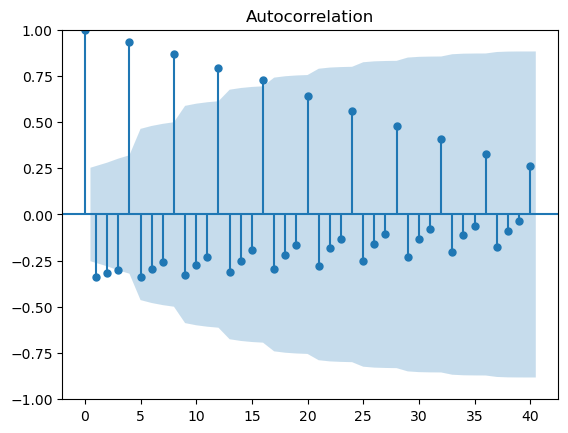

In [162]:
#### ACF for log transform and diff(1)
plot_acf(np.log(df_revenue).diff(1).dropna(),lags=40)
plt.title("Autocorrelation")
plt.show()

#### Inference -> q=1,2,4,8,12,16

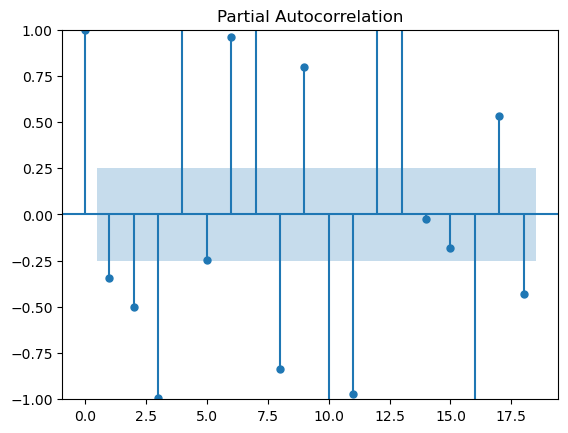

In [164]:
#### PACF for log transform and diff(1)
plot_pacf(np.log(df_revenue).diff(1).dropna())
plt.title("Partial Autocorrelation")
plt.show()

#### Inference -> p= Any value between 1 to 18 except 5,14,15

In [166]:
print(train_revenue.shape)
print(test_revenue.shape)

(48, 1)
(13, 1)


In [167]:
model = ARIMA(np.log(train_revenue),order=(2,1,2))
arima_fit = model.fit()

In [169]:
fcast_arima_revenue = np.exp(arima_fit.forecast(len(test_revenue)))
print(fcast_arima_revenue)

2017-03-31    35992.612395
2017-06-30    32236.691981
2017-09-30    38614.322858
2017-12-31    42755.030454
2018-03-31    36174.399689
2018-06-30    32923.979085
2018-09-30    38434.122293
2018-12-31    41928.542554
2019-03-31    36331.845216
2019-06-30    33524.051315
2019-09-30    38279.459791
2019-12-31    41233.628992
2020-03-31    36468.114195
Freq: Q-DEC, Name: predicted_mean, dtype: float64


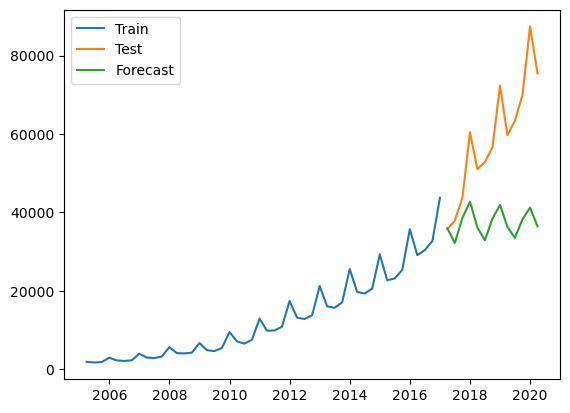

,MAE,MSE,RMSE,MAPE
"ARIMA(p=2,d=1,q=2)",21722.109536,6.420617e+08,25338.936891,0.3338


In [170]:
plot_res(train_revenue,test_revenue,fcast_arima_revenue)
arima_res = eval_model(test_revenue,fcast_arima_revenue,"ARIMA(p=2,d=1,q=2)")
arima_res

In [181]:
min_rmse_arima_revenue = 999999999999
pv_revenue=dv_revenue=qv_revenue = 0
c = 0
p_revenue = list(range(1,16))
d_revenue = list(range(1,3))
q_revenue = list(range(1,11))

for i in p_revenue:
    for j in d_revenue:
        for k in q_revenue:
            model = ARIMA(np.log(train_revenue),order=(i,j,k))
            arima_fit = model.fit()
            fcast = np.exp(arima_fit.forecast(len(test_revenue)))
            mse = mean_squared_error(test_revenue,fcast)
            rmse = np.sqrt(mse)
            c +=1
            print(f"For Iteration {c},p={i},d={j},q={k},RMSE={rmse}")
            if rmse <= min_rmse_arima_revenue:
                min_rmse_arima_revenue = rmse
                pv_revenue=i
                dv_revenue=j
                qv_revenue=k

For Iteration 1,p=1,d=1,q=1,RMSE=7209.769371222659
For Iteration 2,p=1,d=1,q=2,RMSE=25225.162582355264
For Iteration 3,p=1,d=1,q=3,RMSE=26218.717668941157
For Iteration 4,p=1,d=1,q=4,RMSE=19300.488750765016
For Iteration 5,p=1,d=1,q=5,RMSE=19588.87456623899
For Iteration 6,p=1,d=1,q=6,RMSE=19632.612654826353
For Iteration 7,p=1,d=1,q=7,RMSE=21629.00650069177
For Iteration 8,p=1,d=1,q=8,RMSE=12334.877141742581
For Iteration 9,p=1,d=1,q=9,RMSE=18935.066582802003
For Iteration 10,p=1,d=1,q=10,RMSE=19123.719431002475
For Iteration 11,p=1,d=2,q=1,RMSE=11735.063646050723
For Iteration 12,p=1,d=2,q=2,RMSE=8652.226722918658
For Iteration 13,p=1,d=2,q=3,RMSE=5551.0870179386775
For Iteration 14,p=1,d=2,q=4,RMSE=16452.623356654134
For Iteration 15,p=1,d=2,q=5,RMSE=6330.192425094873
For Iteration 16,p=1,d=2,q=6,RMSE=5411.202227711331
For Iteration 17,p=1,d=2,q=7,RMSE=5747.602441345943
For Iteration 18,p=1,d=2,q=8,RMSE=8168.073935272025
For Iteration 19,p=1,d=2,q=9,RMSE=4933.775084160422
For Iterat

For Iteration 157,p=8,d=2,q=7,RMSE=9154.234683108092
For Iteration 158,p=8,d=2,q=8,RMSE=5454.585478079113
For Iteration 159,p=8,d=2,q=9,RMSE=4830.234195952937
For Iteration 160,p=8,d=2,q=10,RMSE=4925.4202072830185
For Iteration 161,p=9,d=1,q=1,RMSE=9056.139455057419
For Iteration 162,p=9,d=1,q=2,RMSE=10892.275664295437
For Iteration 163,p=9,d=1,q=3,RMSE=9651.601947282412
For Iteration 164,p=9,d=1,q=4,RMSE=8974.645259231496
For Iteration 165,p=9,d=1,q=5,RMSE=10846.700193647755
For Iteration 166,p=9,d=1,q=6,RMSE=9150.446238271483
For Iteration 167,p=9,d=1,q=7,RMSE=15376.841362063464
For Iteration 168,p=9,d=1,q=8,RMSE=9869.128061333215
For Iteration 169,p=9,d=1,q=9,RMSE=10009.94654771492
For Iteration 170,p=9,d=1,q=10,RMSE=9956.9223525116
For Iteration 171,p=9,d=2,q=1,RMSE=8900.169015940748
For Iteration 172,p=9,d=2,q=2,RMSE=8335.97784694675
For Iteration 173,p=9,d=2,q=3,RMSE=6507.913050890084
For Iteration 174,p=9,d=2,q=4,RMSE=10096.656165353701
For Iteration 175,p=9,d=2,q=5,RMSE=5857.16

In [182]:
print("Minimum RMSE for ARIMA = ",min_rmse_arima_revenue)
print("p for Minimum RMSE = ",pv_revenue)
print("d for Minimum RMSE = ",dv_revenue)
print("q for Minimum RMSE = ",qv_revenue)

Minimum RMSE for ARIMA =  2343.630878443706
p for Minimum RMSE =  9
d for Minimum RMSE =  2
q for Minimum RMSE =  10


### SARIMA Model For Revenue

In [212]:
p = [2,3,4,6,9]
d = [1,2]
q = [1,2,4,5,10]
P = [0,1,2]
D = [1,2]
Q = [0,1,2]
m = [12]

pdq = list(product(p,d,q))
print(pdq)
sPDQ = list(product(P,D,Q,m))
print(sPDQ)

[(2, 1, 1), (2, 1, 2), (2, 1, 4), (2, 1, 5), (2, 1, 10), (2, 2, 1), (2, 2, 2), (2, 2, 4), (2, 2, 5), (2, 2, 10), (3, 1, 1), (3, 1, 2), (3, 1, 4), (3, 1, 5), (3, 1, 10), (3, 2, 1), (3, 2, 2), (3, 2, 4), (3, 2, 5), (3, 2, 10), (4, 1, 1), (4, 1, 2), (4, 1, 4), (4, 1, 5), (4, 1, 10), (4, 2, 1), (4, 2, 2), (4, 2, 4), (4, 2, 5), (4, 2, 10), (6, 1, 1), (6, 1, 2), (6, 1, 4), (6, 1, 5), (6, 1, 10), (6, 2, 1), (6, 2, 2), (6, 2, 4), (6, 2, 5), (6, 2, 10), (9, 1, 1), (9, 1, 2), (9, 1, 4), (9, 1, 5), (9, 1, 10), (9, 2, 1), (9, 2, 2), (9, 2, 4), (9, 2, 5), (9, 2, 10)]
[(0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 2, 0, 12), (0, 2, 1, 12), (0, 2, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 0, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 0, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [215]:
min_rmse_sarima = 9999999999999999
pdq_val = PDQ_val = 0
c = 0
try:
    for i in pdq:
        for j in sPDQ:
            model = SARIMAX(np.log(train_revenue),order=i,seasonal_order=j)
            sarima_fit = model.fit()
            fcast = np.exp(sarima_fit.forecast(len(test_revenue)))
            mse = mean_squared_error(test_revenue,fcast)
            rmse = np.sqrt(mse)
            c +=1
            print(f"For Iteration {c},pdq={i},PDQ={j},RMSE={rmse}")
            if rmse <= min_rmse_sarima:
                min_rmse_sarima = rmse
                pdq_val=i
                PDQ_val=j
except:
    pass

For Iteration 1,pdq=(2, 1, 1),PDQ=(0, 1, 0, 12),RMSE=10614.61803919487
For Iteration 2,pdq=(2, 1, 1),PDQ=(0, 1, 1, 12),RMSE=12260.859775031415
For Iteration 3,pdq=(2, 1, 1),PDQ=(0, 1, 2, 12),RMSE=12281.049469551113
For Iteration 4,pdq=(2, 1, 1),PDQ=(0, 2, 0, 12),RMSE=16863.533580782736
For Iteration 5,pdq=(2, 1, 1),PDQ=(0, 2, 1, 12),RMSE=13721.16097544979
For Iteration 6,pdq=(2, 1, 1),PDQ=(0, 2, 2, 12),RMSE=14040.724367982106
For Iteration 7,pdq=(2, 1, 1),PDQ=(1, 1, 0, 12),RMSE=12287.238071703063
For Iteration 8,pdq=(2, 1, 1),PDQ=(1, 1, 1, 12),RMSE=12244.71261048677
For Iteration 9,pdq=(2, 1, 1),PDQ=(1, 1, 2, 12),RMSE=12246.012428816524
For Iteration 10,pdq=(2, 1, 1),PDQ=(1, 2, 0, 12),RMSE=14886.278230121261
For Iteration 11,pdq=(2, 1, 1),PDQ=(1, 2, 1, 12),RMSE=14329.801354503848
For Iteration 12,pdq=(2, 1, 1),PDQ=(1, 2, 2, 12),RMSE=14486.606518327815
For Iteration 13,pdq=(2, 1, 1),PDQ=(2, 1, 0, 12),RMSE=12173.193604971493
For Iteration 14,pdq=(2, 1, 1),PDQ=(2, 1, 1, 12),RMSE=12194.195

In [216]:
print("Minimum RMSE for SARIMA = ",min_rmse_sarima)
print("pdq for Minimum RMSE = ",pdq_val)
print("PDQ for Minimum RMSE = ",PDQ_val)

Minimum RMSE for SARIMA =  8316.653999553979
pdq for Minimum RMSE =  (2, 1, 5)
PDQ for Minimum RMSE =  (0, 2, 1, 12)


### Triple Exponential Smmothing For Net Income

In [229]:
alpha = 0.2
beta = 0.38
gamma = 0.45
tes = ExponentialSmoothing(train_net_income,trend='add',seasonal='add',freq='Q')
tes_m = tes.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

In [230]:
fcast_tes = tes_m.forecast(test_net_income.shape[0])
fcast_tes

2017-03-31     817.714743
2017-06-30     999.055851
2017-09-30     647.136012
2017-12-31    1207.485540
2018-03-31    1173.183645
2018-06-30    1354.524753
2018-09-30    1002.604915
2018-12-31    1562.954443
2019-03-31    1528.652547
2019-06-30    1709.993655
2019-09-30    1358.073817
2019-12-31    1918.423345
2020-03-31    1884.121449
Freq: Q-DEC, dtype: float64

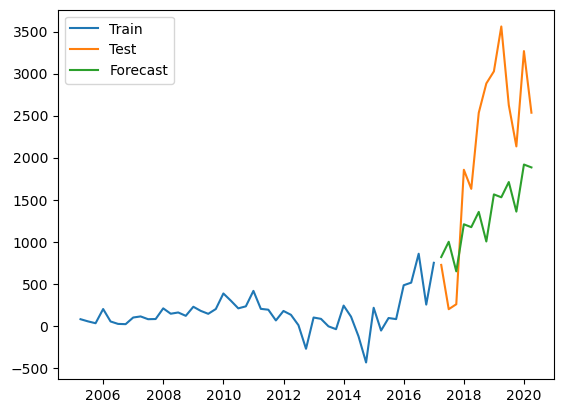

,MAE,MSE,RMSE,MAPE
"TES(alpha=0.2,beta=0.38,gamma=0.45)",972.222192,1.255278e+06,1120.391901,0.762452


In [231]:
plot_res(train_net_income,test_net_income,fcast_tes)
tes_res = eval_model(test_net_income,fcast_tes,'TES(alpha=0.2,beta=0.38,gamma=0.45)')
tes_res

In [233]:
min_rmse_net_income = 99999999999
av_net_income = bv_net_income = gv_net_income = 0
alpha_net_income = [round(item,2) for item in list(np.linspace(start=0.02,stop=0.5,num=15))]
beta_net_income = [round(item,2) for item in list(np.linspace(start=0.02,stop=0.5,num=15))]
gamma_net_income = [round(item,2) for item in list(np.linspace(start=0.02,stop=0.5,num=15))]
c = 0

for i in alpha_net_income:
    for j in beta_net_income:
        for k in gamma_net_income:
            tes = ExponentialSmoothing(train_net_income,trend='add',seasonal='add',freq='Q')
            tes_model = tes.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k)
            fcast = tes_model.forecast(len(test_net_income))
            mse = mean_squared_error(test_net_income,fcast)
            rmse = np.sqrt(mse)
            c = c+1
            print(f"For Iteration {c} - alpha:{i}, beta:{j}, gamma:{k} and RMSE:{rmse}")
            if rmse<min_rmse_net_income:
                min_rmse_net_income = rmse
                av_net_income = i
                bv_net_income = j
                gv_net_income = k

For Iteration 1 - alpha:0.02, beta:0.02, gamma:0.02 and RMSE:2111.602130305069
For Iteration 2 - alpha:0.02, beta:0.02, gamma:0.05 and RMSE:2110.4428742745818
For Iteration 3 - alpha:0.02, beta:0.02, gamma:0.09 and RMSE:2106.9744812796894
For Iteration 4 - alpha:0.02, beta:0.02, gamma:0.12 and RMSE:2102.91489003674
For Iteration 5 - alpha:0.02, beta:0.02, gamma:0.16 and RMSE:2095.635202968793
For Iteration 6 - alpha:0.02, beta:0.02, gamma:0.19 and RMSE:2088.8671633801596
For Iteration 7 - alpha:0.02, beta:0.02, gamma:0.23 and RMSE:2078.2778663897247
For Iteration 8 - alpha:0.02, beta:0.02, gamma:0.26 and RMSE:2069.2809440906162
For Iteration 9 - alpha:0.02, beta:0.02, gamma:0.29 and RMSE:2059.491188244613
For Iteration 10 - alpha:0.02, beta:0.02, gamma:0.33 and RMSE:2045.37889287982
For Iteration 11 - alpha:0.02, beta:0.02, gamma:0.36 and RMSE:2034.1270479188952
For Iteration 12 - alpha:0.02, beta:0.02, gamma:0.4 and RMSE:2018.419670015791
For Iteration 13 - alpha:0.02, beta:0.02, gamm

For Iteration 103 - alpha:0.02, beta:0.23, gamma:0.43 and RMSE:2015.0847882803673
For Iteration 104 - alpha:0.02, beta:0.23, gamma:0.47 and RMSE:1995.1339297714665
For Iteration 105 - alpha:0.02, beta:0.23, gamma:0.5 and RMSE:1980.1796762796928
For Iteration 106 - alpha:0.02, beta:0.26, gamma:0.02 and RMSE:2153.8277193230447
For Iteration 107 - alpha:0.02, beta:0.26, gamma:0.05 and RMSE:2151.5405655755776
For Iteration 108 - alpha:0.02, beta:0.26, gamma:0.09 and RMSE:2145.943015201489
For Iteration 109 - alpha:0.02, beta:0.26, gamma:0.12 and RMSE:2139.8424527006036
For Iteration 110 - alpha:0.02, beta:0.26, gamma:0.16 and RMSE:2129.3106999898646
For Iteration 111 - alpha:0.02, beta:0.26, gamma:0.19 and RMSE:2119.7681741838724
For Iteration 112 - alpha:0.02, beta:0.26, gamma:0.23 and RMSE:2105.1324860566456
For Iteration 113 - alpha:0.02, beta:0.26, gamma:0.26 and RMSE:2092.927720017205
For Iteration 114 - alpha:0.02, beta:0.26, gamma:0.29 and RMSE:2079.851542321931
For Iteration 115 - 

For Iteration 204 - alpha:0.02, beta:0.47, gamma:0.29 and RMSE:2046.0933339044143
For Iteration 205 - alpha:0.02, beta:0.47, gamma:0.33 and RMSE:2023.9251898644904
For Iteration 206 - alpha:0.02, beta:0.47, gamma:0.36 and RMSE:2006.9425673662724
For Iteration 207 - alpha:0.02, beta:0.47, gamma:0.4 and RMSE:1984.1781803086656
For Iteration 208 - alpha:0.02, beta:0.47, gamma:0.43 and RMSE:1967.2108910916158
For Iteration 209 - alpha:0.02, beta:0.47, gamma:0.47 and RMSE:1944.9539856633353
For Iteration 210 - alpha:0.02, beta:0.47, gamma:0.5 and RMSE:1928.648694873376
For Iteration 211 - alpha:0.02, beta:0.5, gamma:0.02 and RMSE:2139.4990050946
For Iteration 212 - alpha:0.02, beta:0.5, gamma:0.05 and RMSE:2135.5612103344765
For Iteration 213 - alpha:0.02, beta:0.5, gamma:0.09 and RMSE:2127.112095383446
For Iteration 214 - alpha:0.02, beta:0.5, gamma:0.12 and RMSE:2118.3948118203903
For Iteration 215 - alpha:0.02, beta:0.5, gamma:0.16 and RMSE:2103.8190520973712
For Iteration 216 - alpha:0.

For Iteration 307 - alpha:0.05, beta:0.19, gamma:0.23 and RMSE:2012.3927954629241
For Iteration 308 - alpha:0.05, beta:0.19, gamma:0.26 and RMSE:1996.4179247293469
For Iteration 309 - alpha:0.05, beta:0.19, gamma:0.29 and RMSE:1980.367860078226
For Iteration 310 - alpha:0.05, beta:0.19, gamma:0.33 and RMSE:1959.086304764779
For Iteration 311 - alpha:0.05, beta:0.19, gamma:0.36 and RMSE:1943.3532459015375
For Iteration 312 - alpha:0.05, beta:0.19, gamma:0.4 and RMSE:1922.8330268174818
For Iteration 313 - alpha:0.05, beta:0.19, gamma:0.43 and RMSE:1907.8596351013048
For Iteration 314 - alpha:0.05, beta:0.19, gamma:0.47 and RMSE:1888.523610987333
For Iteration 315 - alpha:0.05, beta:0.19, gamma:0.5 and RMSE:1874.5220682928878
For Iteration 316 - alpha:0.05, beta:0.23, gamma:0.02 and RMSE:2092.6960866415084
For Iteration 317 - alpha:0.05, beta:0.23, gamma:0.05 and RMSE:2081.0091645324605
For Iteration 318 - alpha:0.05, beta:0.23, gamma:0.09 and RMSE:2063.0988856897575
For Iteration 319 - a

For Iteration 420 - alpha:0.05, beta:0.43, gamma:0.5 and RMSE:1653.456938234953
For Iteration 421 - alpha:0.05, beta:0.47, gamma:0.02 and RMSE:1838.1468900609175
For Iteration 422 - alpha:0.05, beta:0.47, gamma:0.05 and RMSE:1822.015566893159
For Iteration 423 - alpha:0.05, beta:0.47, gamma:0.09 and RMSE:1800.0712989576011
For Iteration 424 - alpha:0.05, beta:0.47, gamma:0.12 and RMSE:1783.4615718618584
For Iteration 425 - alpha:0.05, beta:0.47, gamma:0.16 and RMSE:1761.404247663713
For Iteration 426 - alpha:0.05, beta:0.47, gamma:0.19 and RMSE:1745.120833016437
For Iteration 427 - alpha:0.05, beta:0.47, gamma:0.23 and RMSE:1724.0071041521392
For Iteration 428 - alpha:0.05, beta:0.47, gamma:0.26 and RMSE:1708.7585115662218
For Iteration 429 - alpha:0.05, beta:0.47, gamma:0.29 and RMSE:1694.1038601061437
For Iteration 430 - alpha:0.05, beta:0.47, gamma:0.33 and RMSE:1675.581276617162
For Iteration 431 - alpha:0.05, beta:0.47, gamma:0.36 and RMSE:1662.4957663423213
For Iteration 432 - al

For Iteration 525 - alpha:0.09, beta:0.16, gamma:0.5 and RMSE:1752.0074164621894
For Iteration 526 - alpha:0.09, beta:0.19, gamma:0.02 and RMSE:1937.0234194161987
For Iteration 527 - alpha:0.09, beta:0.19, gamma:0.05 and RMSE:1919.2976272772753
For Iteration 528 - alpha:0.09, beta:0.19, gamma:0.09 and RMSE:1895.7823473054095
For Iteration 529 - alpha:0.09, beta:0.19, gamma:0.12 and RMSE:1878.4041303096665
For Iteration 530 - alpha:0.09, beta:0.19, gamma:0.16 and RMSE:1855.821381549266
For Iteration 531 - alpha:0.09, beta:0.19, gamma:0.19 and RMSE:1839.4690852439287
For Iteration 532 - alpha:0.09, beta:0.19, gamma:0.23 and RMSE:1818.5999220442982
For Iteration 533 - alpha:0.09, beta:0.19, gamma:0.26 and RMSE:1803.7125323844741
For Iteration 534 - alpha:0.09, beta:0.19, gamma:0.29 and RMSE:1789.5072654072032
For Iteration 535 - alpha:0.09, beta:0.19, gamma:0.33 and RMSE:1771.6324055444604
For Iteration 536 - alpha:0.09, beta:0.19, gamma:0.36 and RMSE:1759.011285620254
For Iteration 537 -

For Iteration 638 - alpha:0.09, beta:0.43, gamma:0.26 and RMSE:1340.4842617798795
For Iteration 639 - alpha:0.09, beta:0.43, gamma:0.29 and RMSE:1339.160679921897
For Iteration 640 - alpha:0.09, beta:0.43, gamma:0.33 and RMSE:1337.8092530452982
For Iteration 641 - alpha:0.09, beta:0.43, gamma:0.36 and RMSE:1337.0507261212972
For Iteration 642 - alpha:0.09, beta:0.43, gamma:0.4 and RMSE:1336.3060822834216
For Iteration 643 - alpha:0.09, beta:0.43, gamma:0.43 and RMSE:1335.9056226974349
For Iteration 644 - alpha:0.09, beta:0.43, gamma:0.47 and RMSE:1335.5343694144815
For Iteration 645 - alpha:0.09, beta:0.43, gamma:0.5 and RMSE:1335.3552757395132
For Iteration 646 - alpha:0.09, beta:0.47, gamma:0.02 and RMSE:1275.3531639661865
For Iteration 647 - alpha:0.09, beta:0.47, gamma:0.05 and RMSE:1273.2522960794322
For Iteration 648 - alpha:0.09, beta:0.47, gamma:0.09 and RMSE:1271.3931930564995
For Iteration 649 - alpha:0.09, beta:0.47, gamma:0.12 and RMSE:1270.5589788123611
For Iteration 650 -

For Iteration 742 - alpha:0.12, beta:0.16, gamma:0.23 and RMSE:1744.3844156223986
For Iteration 743 - alpha:0.12, beta:0.16, gamma:0.26 and RMSE:1732.7076458161014
For Iteration 744 - alpha:0.12, beta:0.16, gamma:0.29 and RMSE:1721.6367313677158
For Iteration 745 - alpha:0.12, beta:0.16, gamma:0.33 and RMSE:1707.7910246521858
For Iteration 746 - alpha:0.12, beta:0.16, gamma:0.36 and RMSE:1698.0644959800102
For Iteration 747 - alpha:0.12, beta:0.16, gamma:0.4 and RMSE:1685.9234508619127
For Iteration 748 - alpha:0.12, beta:0.16, gamma:0.43 and RMSE:1677.4032771723344
For Iteration 749 - alpha:0.12, beta:0.16, gamma:0.47 and RMSE:1666.7737735428095
For Iteration 750 - alpha:0.12, beta:0.16, gamma:0.5 and RMSE:1659.317982869513
For Iteration 751 - alpha:0.12, beta:0.19, gamma:0.02 and RMSE:1764.3367900233213
For Iteration 752 - alpha:0.12, beta:0.19, gamma:0.05 and RMSE:1750.4421658309084
For Iteration 753 - alpha:0.12, beta:0.19, gamma:0.09 and RMSE:1732.6183420996579
For Iteration 754 -

For Iteration 846 - alpha:0.12, beta:0.4, gamma:0.19 and RMSE:1212.294234078172
For Iteration 847 - alpha:0.12, beta:0.4, gamma:0.23 and RMSE:1216.3829597194758
For Iteration 848 - alpha:0.12, beta:0.4, gamma:0.26 and RMSE:1219.3806702578988
For Iteration 849 - alpha:0.12, beta:0.4, gamma:0.29 and RMSE:1222.318749245431
For Iteration 850 - alpha:0.12, beta:0.4, gamma:0.33 and RMSE:1226.1378816934712
For Iteration 851 - alpha:0.12, beta:0.4, gamma:0.36 and RMSE:1228.9258921954593
For Iteration 852 - alpha:0.12, beta:0.4, gamma:0.4 and RMSE:1232.5442264118658
For Iteration 853 - alpha:0.12, beta:0.4, gamma:0.43 and RMSE:1235.1914970254077
For Iteration 854 - alpha:0.12, beta:0.4, gamma:0.47 and RMSE:1238.653124046031
For Iteration 855 - alpha:0.12, beta:0.4, gamma:0.5 and RMSE:1241.2184747806505
For Iteration 856 - alpha:0.12, beta:0.43, gamma:0.02 and RMSE:1131.2353296421848
For Iteration 857 - alpha:0.12, beta:0.43, gamma:0.05 and RMSE:1137.020779062208
For Iteration 858 - alpha:0.12, 

For Iteration 949 - alpha:0.16, beta:0.12, gamma:0.12 and RMSE:1751.5862113382652
For Iteration 950 - alpha:0.16, beta:0.12, gamma:0.16 and RMSE:1737.557266202153
For Iteration 951 - alpha:0.16, beta:0.12, gamma:0.19 and RMSE:1727.5301462062562
For Iteration 952 - alpha:0.16, beta:0.12, gamma:0.23 and RMSE:1714.8637126732724
For Iteration 953 - alpha:0.16, beta:0.12, gamma:0.26 and RMSE:1705.9026504219344
For Iteration 954 - alpha:0.16, beta:0.12, gamma:0.29 and RMSE:1697.4002631548708
For Iteration 955 - alpha:0.16, beta:0.12, gamma:0.33 and RMSE:1686.7578356797808
For Iteration 956 - alpha:0.16, beta:0.12, gamma:0.36 and RMSE:1679.2765881032676
For Iteration 957 - alpha:0.16, beta:0.12, gamma:0.4 and RMSE:1669.9365675945842
For Iteration 958 - alpha:0.16, beta:0.12, gamma:0.43 and RMSE:1663.3857788585246
For Iteration 959 - alpha:0.16, beta:0.12, gamma:0.47 and RMSE:1655.2277376341174
For Iteration 960 - alpha:0.16, beta:0.12, gamma:0.5 and RMSE:1649.524248685626
For Iteration 961 - 

For Iteration 1055 - alpha:0.16, beta:0.36, gamma:0.16 and RMSE:1149.289543603314
For Iteration 1056 - alpha:0.16, beta:0.36, gamma:0.19 and RMSE:1154.00787414362
For Iteration 1057 - alpha:0.16, beta:0.36, gamma:0.23 and RMSE:1159.9215593650285
For Iteration 1058 - alpha:0.16, beta:0.36, gamma:0.26 and RMSE:1164.15700279513
For Iteration 1059 - alpha:0.16, beta:0.36, gamma:0.29 and RMSE:1168.271668353753
For Iteration 1060 - alpha:0.16, beta:0.36, gamma:0.33 and RMSE:1173.627847895907
For Iteration 1061 - alpha:0.16, beta:0.36, gamma:0.36 and RMSE:1177.5839313028996
For Iteration 1062 - alpha:0.16, beta:0.36, gamma:0.4 and RMSE:1182.8262713250813
For Iteration 1063 - alpha:0.16, beta:0.36, gamma:0.43 and RMSE:1186.766441147127
For Iteration 1064 - alpha:0.16, beta:0.36, gamma:0.47 and RMSE:1192.0801297504072
For Iteration 1065 - alpha:0.16, beta:0.36, gamma:0.5 and RMSE:1196.1450899312256
For Iteration 1066 - alpha:0.16, beta:0.4, gamma:0.02 and RMSE:1056.72534623292
For Iteration 106

For Iteration 1161 - alpha:0.19, beta:0.09, gamma:0.19 and RMSE:1740.1018904233913
For Iteration 1162 - alpha:0.19, beta:0.09, gamma:0.23 and RMSE:1729.0293161570762
For Iteration 1163 - alpha:0.19, beta:0.09, gamma:0.26 and RMSE:1721.1447959201428
For Iteration 1164 - alpha:0.19, beta:0.09, gamma:0.29 and RMSE:1713.6261611441348
For Iteration 1165 - alpha:0.19, beta:0.09, gamma:0.33 and RMSE:1704.165559985292
For Iteration 1166 - alpha:0.19, beta:0.09, gamma:0.36 and RMSE:1697.484563508497
For Iteration 1167 - alpha:0.19, beta:0.09, gamma:0.4 and RMSE:1689.1121638825568
For Iteration 1168 - alpha:0.19, beta:0.09, gamma:0.43 and RMSE:1683.2225293413148
For Iteration 1169 - alpha:0.19, beta:0.09, gamma:0.47 and RMSE:1675.873910810508
For Iteration 1170 - alpha:0.19, beta:0.09, gamma:0.5 and RMSE:1670.7315504068895
For Iteration 1171 - alpha:0.19, beta:0.12, gamma:0.02 and RMSE:1704.3754840277977
For Iteration 1172 - alpha:0.19, beta:0.12, gamma:0.05 and RMSE:1695.8043462424744
For Itera

For Iteration 1263 - alpha:0.19, beta:0.33, gamma:0.09 and RMSE:1134.633091090854
For Iteration 1264 - alpha:0.19, beta:0.33, gamma:0.12 and RMSE:1140.208946291088
For Iteration 1265 - alpha:0.19, beta:0.33, gamma:0.16 and RMSE:1146.874982138775
For Iteration 1266 - alpha:0.19, beta:0.33, gamma:0.19 and RMSE:1151.4891007486922
For Iteration 1267 - alpha:0.19, beta:0.33, gamma:0.23 and RMSE:1157.3446934289254
For Iteration 1268 - alpha:0.19, beta:0.33, gamma:0.26 and RMSE:1161.6160974060328
For Iteration 1269 - alpha:0.19, beta:0.33, gamma:0.29 and RMSE:1165.8452567267768
For Iteration 1270 - alpha:0.19, beta:0.33, gamma:0.33 and RMSE:1171.4857894860095
For Iteration 1271 - alpha:0.19, beta:0.33, gamma:0.36 and RMSE:1175.757439310406
For Iteration 1272 - alpha:0.19, beta:0.33, gamma:0.4 and RMSE:1181.5577203837788
For Iteration 1273 - alpha:0.19, beta:0.33, gamma:0.43 and RMSE:1186.0171991187751
For Iteration 1274 - alpha:0.19, beta:0.33, gamma:0.47 and RMSE:1192.1516851717151
For Itera

For Iteration 1375 - alpha:0.23, beta:0.05, gamma:0.33 and RMSE:1749.3466222844386
For Iteration 1376 - alpha:0.23, beta:0.05, gamma:0.36 and RMSE:1743.0061692554925
For Iteration 1377 - alpha:0.23, beta:0.05, gamma:0.4 and RMSE:1734.9914979178413
For Iteration 1378 - alpha:0.23, beta:0.05, gamma:0.43 and RMSE:1729.310613571267
For Iteration 1379 - alpha:0.23, beta:0.05, gamma:0.47 and RMSE:1722.1739405527965
For Iteration 1380 - alpha:0.23, beta:0.05, gamma:0.5 and RMSE:1717.1500840296035
For Iteration 1381 - alpha:0.23, beta:0.09, gamma:0.02 and RMSE:1715.8155605767038
For Iteration 1382 - alpha:0.23, beta:0.09, gamma:0.05 and RMSE:1709.008572014377
For Iteration 1383 - alpha:0.23, beta:0.09, gamma:0.09 and RMSE:1700.1406287276923
For Iteration 1384 - alpha:0.23, beta:0.09, gamma:0.12 and RMSE:1693.611090607815
For Iteration 1385 - alpha:0.23, beta:0.09, gamma:0.16 and RMSE:1685.1205011711743
For Iteration 1386 - alpha:0.23, beta:0.09, gamma:0.19 and RMSE:1678.9760572041596
For Itera

For Iteration 1483 - alpha:0.23, beta:0.29, gamma:0.43 and RMSE:1213.1595102935296
For Iteration 1484 - alpha:0.23, beta:0.29, gamma:0.47 and RMSE:1219.9788460285436
For Iteration 1485 - alpha:0.23, beta:0.29, gamma:0.5 and RMSE:1225.3063052317202
For Iteration 1486 - alpha:0.23, beta:0.33, gamma:0.02 and RMSE:1084.1050779531383
For Iteration 1487 - alpha:0.23, beta:0.33, gamma:0.05 and RMSE:1091.753118326606
For Iteration 1488 - alpha:0.23, beta:0.33, gamma:0.09 and RMSE:1100.6991988207715
For Iteration 1489 - alpha:0.23, beta:0.33, gamma:0.12 and RMSE:1106.6100643807954
For Iteration 1490 - alpha:0.23, beta:0.33, gamma:0.16 and RMSE:1113.779545283606
For Iteration 1491 - alpha:0.23, beta:0.33, gamma:0.19 and RMSE:1118.8598095841926
For Iteration 1492 - alpha:0.23, beta:0.33, gamma:0.23 and RMSE:1125.4987858941763
For Iteration 1493 - alpha:0.23, beta:0.33, gamma:0.26 and RMSE:1130.4948452686845
For Iteration 1494 - alpha:0.23, beta:0.33, gamma:0.29 and RMSE:1135.571837408685
For Iter

For Iteration 1588 - alpha:0.26, beta:0.02, gamma:0.43 and RMSE:1756.4855580624856
For Iteration 1589 - alpha:0.26, beta:0.02, gamma:0.47 and RMSE:1749.5450145904917
For Iteration 1590 - alpha:0.26, beta:0.02, gamma:0.5 and RMSE:1744.6396568871562
For Iteration 1591 - alpha:0.26, beta:0.05, gamma:0.02 and RMSE:1792.3156618188927
For Iteration 1592 - alpha:0.26, beta:0.05, gamma:0.05 and RMSE:1785.5648276275645
For Iteration 1593 - alpha:0.26, beta:0.05, gamma:0.09 and RMSE:1776.6372099172795
For Iteration 1594 - alpha:0.26, beta:0.05, gamma:0.12 and RMSE:1769.966666467938
For Iteration 1595 - alpha:0.26, beta:0.05, gamma:0.16 and RMSE:1761.1620702173377
For Iteration 1596 - alpha:0.26, beta:0.05, gamma:0.19 and RMSE:1754.6914600591033
For Iteration 1597 - alpha:0.26, beta:0.05, gamma:0.23 and RMSE:1746.3288480100482
For Iteration 1598 - alpha:0.26, beta:0.05, gamma:0.26 and RMSE:1740.2995410519416
For Iteration 1599 - alpha:0.26, beta:0.05, gamma:0.29 and RMSE:1734.501455446681
For Ite

For Iteration 1690 - alpha:0.26, beta:0.26, gamma:0.33 and RMSE:1231.6266764018278
For Iteration 1691 - alpha:0.26, beta:0.26, gamma:0.36 and RMSE:1236.2639335059114
For Iteration 1692 - alpha:0.26, beta:0.26, gamma:0.4 and RMSE:1242.6664892007757
For Iteration 1693 - alpha:0.26, beta:0.26, gamma:0.43 and RMSE:1247.64717204455
For Iteration 1694 - alpha:0.26, beta:0.26, gamma:0.47 and RMSE:1254.5396659246228
For Iteration 1695 - alpha:0.26, beta:0.26, gamma:0.5 and RMSE:1259.9032611221257
For Iteration 1696 - alpha:0.26, beta:0.29, gamma:0.02 and RMSE:1129.1252062232907
For Iteration 1697 - alpha:0.26, beta:0.29, gamma:0.05 and RMSE:1136.7181917585801
For Iteration 1698 - alpha:0.26, beta:0.29, gamma:0.09 and RMSE:1145.6727725852345
For Iteration 1699 - alpha:0.26, beta:0.29, gamma:0.12 and RMSE:1151.6164364853435
For Iteration 1700 - alpha:0.26, beta:0.29, gamma:0.16 and RMSE:1158.8365760937102
For Iteration 1701 - alpha:0.26, beta:0.29, gamma:0.19 and RMSE:1163.9526339790389
For Iter

For Iteration 1792 - alpha:0.26, beta:0.5, gamma:0.23 and RMSE:1021.2565557316503
For Iteration 1793 - alpha:0.26, beta:0.5, gamma:0.26 and RMSE:1029.7299939464767
For Iteration 1794 - alpha:0.26, beta:0.5, gamma:0.29 and RMSE:1038.6233768263498
For Iteration 1795 - alpha:0.26, beta:0.5, gamma:0.33 and RMSE:1051.1594057344066
For Iteration 1796 - alpha:0.26, beta:0.5, gamma:0.36 and RMSE:1061.0655184185514
For Iteration 1797 - alpha:0.26, beta:0.5, gamma:0.4 and RMSE:1074.9150607477775
For Iteration 1798 - alpha:0.26, beta:0.5, gamma:0.43 and RMSE:1085.7503563959635
For Iteration 1799 - alpha:0.26, beta:0.5, gamma:0.47 and RMSE:1100.7333725621122
For Iteration 1800 - alpha:0.26, beta:0.5, gamma:0.5 and RMSE:1112.3237431709265
For Iteration 1801 - alpha:0.29, beta:0.02, gamma:0.02 and RMSE:1825.0469035693286
For Iteration 1802 - alpha:0.29, beta:0.02, gamma:0.05 and RMSE:1818.8142112858925
For Iteration 1803 - alpha:0.29, beta:0.02, gamma:0.09 and RMSE:1810.5034361894632
For Iteration 1

For Iteration 1898 - alpha:0.29, beta:0.23, gamma:0.26 and RMSE:1265.3533024919948
For Iteration 1899 - alpha:0.29, beta:0.23, gamma:0.29 and RMSE:1269.5877813858788
For Iteration 1900 - alpha:0.29, beta:0.23, gamma:0.33 and RMSE:1275.355788861907
For Iteration 1901 - alpha:0.29, beta:0.23, gamma:0.36 and RMSE:1279.8043544225382
For Iteration 1902 - alpha:0.29, beta:0.23, gamma:0.4 and RMSE:1285.9258739533043
For Iteration 1903 - alpha:0.29, beta:0.23, gamma:0.43 and RMSE:1290.6685840009673
For Iteration 1904 - alpha:0.29, beta:0.23, gamma:0.47 and RMSE:1297.1976622287289
For Iteration 1905 - alpha:0.29, beta:0.23, gamma:0.5 and RMSE:1302.2460006697888
For Iteration 1906 - alpha:0.29, beta:0.26, gamma:0.02 and RMSE:1169.2238715069852
For Iteration 1907 - alpha:0.29, beta:0.26, gamma:0.05 and RMSE:1176.957487831374
For Iteration 1908 - alpha:0.29, beta:0.26, gamma:0.09 and RMSE:1186.1474134782532
For Iteration 1909 - alpha:0.29, beta:0.26, gamma:0.12 and RMSE:1192.2623582865922
For Iter

For Iteration 2000 - alpha:0.29, beta:0.47, gamma:0.16 and RMSE:1047.0829611829106
For Iteration 2001 - alpha:0.29, beta:0.47, gamma:0.19 and RMSE:1056.2752048871355
For Iteration 2002 - alpha:0.29, beta:0.47, gamma:0.23 and RMSE:1068.6466471903411
For Iteration 2003 - alpha:0.29, beta:0.47, gamma:0.26 and RMSE:1078.1509915228792
For Iteration 2004 - alpha:0.29, beta:0.47, gamma:0.29 and RMSE:1087.907461767113
For Iteration 2005 - alpha:0.29, beta:0.47, gamma:0.33 and RMSE:1101.336427995853
For Iteration 2006 - alpha:0.29, beta:0.47, gamma:0.36 and RMSE:1111.716973373265
For Iteration 2007 - alpha:0.29, beta:0.47, gamma:0.4 and RMSE:1125.9297512060198
For Iteration 2008 - alpha:0.29, beta:0.47, gamma:0.43 and RMSE:1136.8254427645475
For Iteration 2009 - alpha:0.29, beta:0.47, gamma:0.47 and RMSE:1151.5864531171687
For Iteration 2010 - alpha:0.29, beta:0.47, gamma:0.5 and RMSE:1162.766927294896
For Iteration 2011 - alpha:0.29, beta:0.5, gamma:0.02 and RMSE:991.4174562838607
For Iteratio

For Iteration 2103 - alpha:0.33, beta:0.19, gamma:0.09 and RMSE:1313.6657530788286
For Iteration 2104 - alpha:0.33, beta:0.19, gamma:0.12 and RMSE:1318.5902765358196
For Iteration 2105 - alpha:0.33, beta:0.19, gamma:0.16 and RMSE:1324.4008985289306
For Iteration 2106 - alpha:0.33, beta:0.19, gamma:0.19 and RMSE:1328.3704194309012
For Iteration 2107 - alpha:0.33, beta:0.19, gamma:0.23 and RMSE:1333.3805643403211
For Iteration 2108 - alpha:0.33, beta:0.19, gamma:0.26 and RMSE:1337.0454129099658
For Iteration 2109 - alpha:0.33, beta:0.19, gamma:0.29 and RMSE:1340.7014470845127
For Iteration 2110 - alpha:0.33, beta:0.19, gamma:0.33 and RMSE:1345.6324735367766
For Iteration 2111 - alpha:0.33, beta:0.19, gamma:0.36 and RMSE:1349.4058339340547
For Iteration 2112 - alpha:0.33, beta:0.19, gamma:0.4 and RMSE:1354.5627035320447
For Iteration 2113 - alpha:0.33, beta:0.19, gamma:0.43 and RMSE:1358.530428575216
For Iteration 2114 - alpha:0.33, beta:0.19, gamma:0.47 and RMSE:1363.9494670902875
For It

For Iteration 2216 - alpha:0.33, beta:0.43, gamma:0.36 and RMSE:1177.207308804479
For Iteration 2217 - alpha:0.33, beta:0.43, gamma:0.4 and RMSE:1190.4586991950027
For Iteration 2218 - alpha:0.33, beta:0.43, gamma:0.43 and RMSE:1200.3532509657766
For Iteration 2219 - alpha:0.33, beta:0.43, gamma:0.47 and RMSE:1213.3937016637824
For Iteration 2220 - alpha:0.33, beta:0.43, gamma:0.5 and RMSE:1222.980575010983
For Iteration 2221 - alpha:0.33, beta:0.47, gamma:0.02 and RMSE:1050.0511159271296
For Iteration 2222 - alpha:0.33, beta:0.47, gamma:0.05 and RMSE:1066.4104959287947
For Iteration 2223 - alpha:0.33, beta:0.47, gamma:0.09 and RMSE:1086.1990547893354
For Iteration 2224 - alpha:0.33, beta:0.47, gamma:0.12 and RMSE:1099.5701804211287
For Iteration 2225 - alpha:0.33, beta:0.47, gamma:0.16 and RMSE:1115.9554032785607
For Iteration 2226 - alpha:0.33, beta:0.47, gamma:0.19 and RMSE:1127.5599238693478
For Iteration 2227 - alpha:0.33, beta:0.47, gamma:0.23 and RMSE:1142.5527410970224
For Iter

For Iteration 2320 - alpha:0.36, beta:0.16, gamma:0.33 and RMSE:1406.4629420157648
For Iteration 2321 - alpha:0.36, beta:0.16, gamma:0.36 and RMSE:1409.4374137622813
For Iteration 2322 - alpha:0.36, beta:0.16, gamma:0.4 and RMSE:1413.482688767349
For Iteration 2323 - alpha:0.36, beta:0.16, gamma:0.43 and RMSE:1416.5820595669686
For Iteration 2324 - alpha:0.36, beta:0.16, gamma:0.47 and RMSE:1420.7948071167762
For Iteration 2325 - alpha:0.36, beta:0.16, gamma:0.5 and RMSE:1424.0013184445095
For Iteration 2326 - alpha:0.36, beta:0.19, gamma:0.02 and RMSE:1294.753394266188
For Iteration 2327 - alpha:0.36, beta:0.19, gamma:0.05 and RMSE:1302.223025413
For Iteration 2328 - alpha:0.36, beta:0.19, gamma:0.09 and RMSE:1311.2082709942297
For Iteration 2329 - alpha:0.36, beta:0.19, gamma:0.12 and RMSE:1317.1424485185266
For Iteration 2330 - alpha:0.36, beta:0.19, gamma:0.16 and RMSE:1324.1335461019833
For Iteration 2331 - alpha:0.36, beta:0.19, gamma:0.19 and RMSE:1328.8681458412248
For Iteratio

For Iteration 2431 - alpha:0.36, beta:0.43, gamma:0.02 and RMSE:1094.4609924233903
For Iteration 2432 - alpha:0.36, beta:0.43, gamma:0.05 and RMSE:1111.72895109421
For Iteration 2433 - alpha:0.36, beta:0.43, gamma:0.09 and RMSE:1132.5480953530507
For Iteration 2434 - alpha:0.36, beta:0.43, gamma:0.12 and RMSE:1146.444124056436
For Iteration 2435 - alpha:0.36, beta:0.43, gamma:0.16 and RMSE:1163.1066261960216
For Iteration 2436 - alpha:0.36, beta:0.43, gamma:0.19 and RMSE:1174.5931389772904
For Iteration 2437 - alpha:0.36, beta:0.43, gamma:0.23 and RMSE:1189.0249244288218
For Iteration 2438 - alpha:0.36, beta:0.43, gamma:0.26 and RMSE:1199.3942198021184
For Iteration 2439 - alpha:0.36, beta:0.43, gamma:0.29 and RMSE:1209.481132419997
For Iteration 2440 - alpha:0.36, beta:0.43, gamma:0.33 and RMSE:1222.574320011763
For Iteration 2441 - alpha:0.36, beta:0.43, gamma:0.36 and RMSE:1232.1475634185808
For Iteration 2442 - alpha:0.36, beta:0.43, gamma:0.4 and RMSE:1244.560030931462
For Iterati

For Iteration 2535 - alpha:0.4, beta:0.12, gamma:0.5 and RMSE:1507.4603028784954
For Iteration 2536 - alpha:0.4, beta:0.16, gamma:0.02 and RMSE:1361.925948396264
For Iteration 2537 - alpha:0.4, beta:0.16, gamma:0.05 and RMSE:1369.1875726070887
For Iteration 2538 - alpha:0.4, beta:0.16, gamma:0.09 and RMSE:1377.9912673036763
For Iteration 2539 - alpha:0.4, beta:0.16, gamma:0.12 and RMSE:1383.7654788298807
For Iteration 2540 - alpha:0.4, beta:0.16, gamma:0.16 and RMSE:1390.4130203232414
For Iteration 2541 - alpha:0.4, beta:0.16, gamma:0.19 and RMSE:1394.7655935646656
For Iteration 2542 - alpha:0.4, beta:0.16, gamma:0.23 and RMSE:1399.9829817051002
For Iteration 2543 - alpha:0.4, beta:0.16, gamma:0.26 and RMSE:1403.6038927721513
For Iteration 2544 - alpha:0.4, beta:0.16, gamma:0.29 and RMSE:1407.0685886345177
For Iteration 2545 - alpha:0.4, beta:0.16, gamma:0.33 and RMSE:1411.5445775608023
For Iteration 2546 - alpha:0.4, beta:0.16, gamma:0.36 and RMSE:1414.8426608268753
For Iteration 2547

For Iteration 2640 - alpha:0.4, beta:0.36, gamma:0.5 and RMSE:1303.8405079355061
For Iteration 2641 - alpha:0.4, beta:0.4, gamma:0.02 and RMSE:1151.987610817521
For Iteration 2642 - alpha:0.4, beta:0.4, gamma:0.05 and RMSE:1170.957612830977
For Iteration 2643 - alpha:0.4, beta:0.4, gamma:0.09 and RMSE:1193.7742164379042
For Iteration 2644 - alpha:0.4, beta:0.4, gamma:0.12 and RMSE:1208.7627577288124
For Iteration 2645 - alpha:0.4, beta:0.4, gamma:0.16 and RMSE:1226.192721848773
For Iteration 2646 - alpha:0.4, beta:0.4, gamma:0.19 and RMSE:1237.7339505606726
For Iteration 2647 - alpha:0.4, beta:0.4, gamma:0.23 and RMSE:1251.6125471405016
For Iteration 2648 - alpha:0.4, beta:0.4, gamma:0.26 and RMSE:1261.1577630510842
For Iteration 2649 - alpha:0.4, beta:0.4, gamma:0.29 and RMSE:1270.1195179843776
For Iteration 2650 - alpha:0.4, beta:0.4, gamma:0.33 and RMSE:1281.3102783154304
For Iteration 2651 - alpha:0.4, beta:0.4, gamma:0.36 and RMSE:1289.1956732558317
For Iteration 2652 - alpha:0.4,

For Iteration 2747 - alpha:0.43, beta:0.12, gamma:0.05 and RMSE:1471.515715252039
For Iteration 2748 - alpha:0.43, beta:0.12, gamma:0.09 and RMSE:1478.3187295351747
For Iteration 2749 - alpha:0.43, beta:0.12, gamma:0.12 and RMSE:1482.6929413924445
For Iteration 2750 - alpha:0.43, beta:0.12, gamma:0.16 and RMSE:1487.5123471024403
For Iteration 2751 - alpha:0.43, beta:0.12, gamma:0.19 and RMSE:1490.483295030698
For Iteration 2752 - alpha:0.43, beta:0.12, gamma:0.23 and RMSE:1493.8209090489477
For Iteration 2753 - alpha:0.43, beta:0.12, gamma:0.26 and RMSE:1496.001444727546
For Iteration 2754 - alpha:0.43, beta:0.12, gamma:0.29 and RMSE:1498.0024162965474
For Iteration 2755 - alpha:0.43, beta:0.12, gamma:0.33 and RMSE:1500.4978284108086
For Iteration 2756 - alpha:0.43, beta:0.12, gamma:0.36 and RMSE:1502.2949422472684
For Iteration 2757 - alpha:0.43, beta:0.12, gamma:0.4 and RMSE:1504.6399747759722
For Iteration 2758 - alpha:0.43, beta:0.12, gamma:0.43 and RMSE:1506.3744646719933
For Iter

For Iteration 2862 - alpha:0.43, beta:0.36, gamma:0.4 and RMSE:1324.600289353372
For Iteration 2863 - alpha:0.43, beta:0.36, gamma:0.43 and RMSE:1329.9839061552923
For Iteration 2864 - alpha:0.43, beta:0.36, gamma:0.47 and RMSE:1336.3574640080594
For Iteration 2865 - alpha:0.43, beta:0.36, gamma:0.5 and RMSE:1340.4435334040998
For Iteration 2866 - alpha:0.43, beta:0.4, gamma:0.02 and RMSE:1200.2183499869504
For Iteration 2867 - alpha:0.43, beta:0.4, gamma:0.05 and RMSE:1221.401427180398
For Iteration 2868 - alpha:0.43, beta:0.4, gamma:0.09 and RMSE:1246.819499171641
For Iteration 2869 - alpha:0.43, beta:0.4, gamma:0.12 and RMSE:1263.2735379508883
For Iteration 2870 - alpha:0.43, beta:0.4, gamma:0.16 and RMSE:1281.8722757234311
For Iteration 2871 - alpha:0.43, beta:0.4, gamma:0.19 and RMSE:1293.7180736898513
For Iteration 2872 - alpha:0.43, beta:0.4, gamma:0.23 and RMSE:1307.338058041693
For Iteration 2873 - alpha:0.43, beta:0.4, gamma:0.26 and RMSE:1316.265931363388
For Iteration 2874 

For Iteration 2962 - alpha:0.47, beta:0.09, gamma:0.23 and RMSE:1573.5609147399264
For Iteration 2963 - alpha:0.47, beta:0.09, gamma:0.26 and RMSE:1574.7264852148444
For Iteration 2964 - alpha:0.47, beta:0.09, gamma:0.29 and RMSE:1575.6512412034551
For Iteration 2965 - alpha:0.47, beta:0.09, gamma:0.33 and RMSE:1576.6339768646635
For Iteration 2966 - alpha:0.47, beta:0.09, gamma:0.36 and RMSE:1577.2515189864916
For Iteration 2967 - alpha:0.47, beta:0.09, gamma:0.4 and RMSE:1577.9813931068138
For Iteration 2968 - alpha:0.47, beta:0.09, gamma:0.43 and RMSE:1578.4827780928465
For Iteration 2969 - alpha:0.47, beta:0.09, gamma:0.47 and RMSE:1579.0979886138875
For Iteration 2970 - alpha:0.47, beta:0.09, gamma:0.5 and RMSE:1579.5074614455268
For Iteration 2971 - alpha:0.47, beta:0.12, gamma:0.02 and RMSE:1464.4054241471065
For Iteration 2972 - alpha:0.47, beta:0.12, gamma:0.05 and RMSE:1471.4410838742576
For Iteration 2973 - alpha:0.47, beta:0.12, gamma:0.09 and RMSE:1480.1571424198241
For It

For Iteration 3063 - alpha:0.47, beta:0.33, gamma:0.09 and RMSE:1276.916944886587
For Iteration 3064 - alpha:0.47, beta:0.33, gamma:0.12 and RMSE:1292.3518205437836
For Iteration 3065 - alpha:0.47, beta:0.33, gamma:0.16 and RMSE:1309.5211210618268
For Iteration 3066 - alpha:0.47, beta:0.33, gamma:0.19 and RMSE:1320.1453991725432
For Iteration 3067 - alpha:0.47, beta:0.33, gamma:0.23 and RMSE:1331.919792297668
For Iteration 3068 - alpha:0.47, beta:0.33, gamma:0.26 and RMSE:1339.3310509813912
For Iteration 3069 - alpha:0.47, beta:0.33, gamma:0.29 and RMSE:1345.7789654530677
For Iteration 3070 - alpha:0.47, beta:0.33, gamma:0.33 and RMSE:1353.1686383540477
For Iteration 3071 - alpha:0.47, beta:0.33, gamma:0.36 and RMSE:1357.9620889452938
For Iteration 3072 - alpha:0.47, beta:0.33, gamma:0.4 and RMSE:1363.4957000521479
For Iteration 3073 - alpha:0.47, beta:0.33, gamma:0.43 and RMSE:1367.039123741671
For Iteration 3074 - alpha:0.47, beta:0.33, gamma:0.47 and RMSE:1370.9220769234985
For Iter

For Iteration 3170 - alpha:0.5, beta:0.05, gamma:0.16 and RMSE:1681.156087851086
For Iteration 3171 - alpha:0.5, beta:0.05, gamma:0.19 and RMSE:1681.6023648347027
For Iteration 3172 - alpha:0.5, beta:0.05, gamma:0.23 and RMSE:1681.467728943544
For Iteration 3173 - alpha:0.5, beta:0.05, gamma:0.26 and RMSE:1680.9536216458305
For Iteration 3174 - alpha:0.5, beta:0.05, gamma:0.29 and RMSE:1680.1881434495879
For Iteration 3175 - alpha:0.5, beta:0.05, gamma:0.33 and RMSE:1678.9066464259402
For Iteration 3176 - alpha:0.5, beta:0.05, gamma:0.36 and RMSE:1677.8252738182266
For Iteration 3177 - alpha:0.5, beta:0.05, gamma:0.4 and RMSE:1676.306445945674
For Iteration 3178 - alpha:0.5, beta:0.05, gamma:0.43 and RMSE:1675.1432612638262
For Iteration 3179 - alpha:0.5, beta:0.05, gamma:0.47 and RMSE:1673.5854115696516
For Iteration 3180 - alpha:0.5, beta:0.05, gamma:0.5 and RMSE:1672.40849339724
For Iteration 3181 - alpha:0.5, beta:0.09, gamma:0.02 and RMSE:1549.5059680459835
For Iteration 3182 - al

For Iteration 3278 - alpha:0.5, beta:0.29, gamma:0.26 and RMSE:1364.3567096712952
For Iteration 3279 - alpha:0.5, beta:0.29, gamma:0.29 and RMSE:1369.8546140655897
For Iteration 3280 - alpha:0.5, beta:0.29, gamma:0.33 and RMSE:1375.8970892256602
For Iteration 3281 - alpha:0.5, beta:0.29, gamma:0.36 and RMSE:1379.6566463825927
For Iteration 3282 - alpha:0.5, beta:0.29, gamma:0.4 and RMSE:1383.8329226208048
For Iteration 3283 - alpha:0.5, beta:0.29, gamma:0.43 and RMSE:1386.407479263138
For Iteration 3284 - alpha:0.5, beta:0.29, gamma:0.47 and RMSE:1389.1067578318357
For Iteration 3285 - alpha:0.5, beta:0.29, gamma:0.5 and RMSE:1390.5260845740668
For Iteration 3286 - alpha:0.5, beta:0.33, gamma:0.02 and RMSE:1269.724619233615
For Iteration 3287 - alpha:0.5, beta:0.33, gamma:0.05 and RMSE:1291.0703536515948
For Iteration 3288 - alpha:0.5, beta:0.33, gamma:0.09 and RMSE:1317.183336546152
For Iteration 3289 - alpha:0.5, beta:0.33, gamma:0.12 and RMSE:1333.9568745539773
For Iteration 3290 - 

In [234]:
print("Minimum RMSE for TES Net Income = ",min_rmse_net_income)
print("Alpha for Minimum RMSE Net Income  = ",av_net_income)
print("Beta for Minimum RMSE Net Income = ",bv_net_income)
print("Gamma for Minimum RMSE Net Income = ",gv_net_income)

Minimum RMSE for TES Net Income =  949.8487996091094
Alpha for Minimum RMSE Net Income  =  0.19
Beta for Minimum RMSE Net Income =  0.5
Gamma for Minimum RMSE Net Income =  0.02


### ARIMA Model For Net Income

In [235]:
adf_test(df_net_income)

Test_Stat -0.2190579245598141
p-val 0.9362115086040738
Ho Accepted - Data is not stationary


In [236]:
adf_test(df_net_income.diff(1).dropna())

Test_Stat -0.5690470967756482
p-val 0.8778238598570328
Ho Accepted - Data is not stationary


In [237]:
adf_test(df_net_income.diff(2).dropna())

Test_Stat 1.968926354537359
p-val 0.9986311879469972
Ho Accepted - Data is not stationary


In [239]:
adf_test(np.log(df_net_income).diff(1).dropna())

Test_Stat -7.924846644488002
p-val 3.641901581280267e-12
H1 Accepted - Data is stationary


#### Data will become stationary after log transform and difference d=1

### Plot ACF and PACF

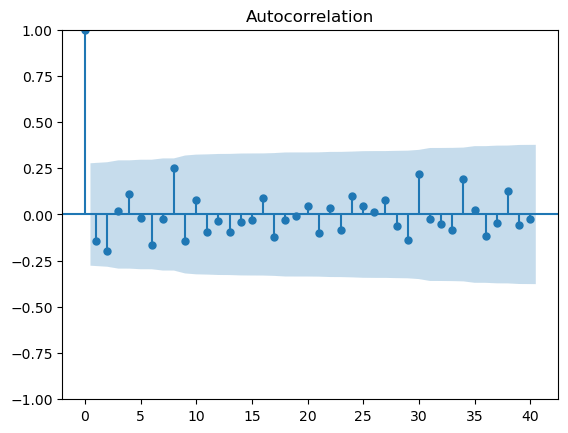

In [240]:
#### ACF for log transform and diff(1)
plot_acf(np.log(df_net_income).diff(1).dropna(),lags=40)
plt.title("Autocorrelation")
plt.show()

#### Inference -> q=1

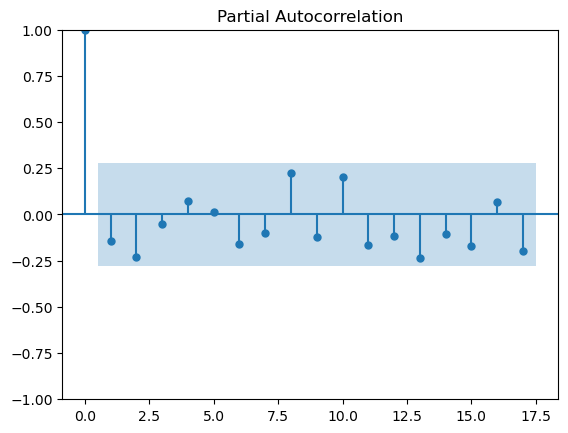

In [241]:
#### PACF for log transform and diff(1)
plot_pacf(np.log(df_net_income).diff(1).dropna())
plt.title("Partial Autocorrelation")
plt.show()

#### Inference -> p= 1

In [242]:
print(train_net_income.shape)
print(test_net_income.shape)

(48, 1)
(13, 1)


In [245]:
model = ARIMA(np.log(train_net_income),order=(1,1,1))
arima_fit = model.fit()

In [246]:
fcast_arima_net_income = np.exp(arima_fit.forecast(len(test_net_income)))
print(fcast_arima_net_income)

2017-03-31    474.527553
2017-06-30    445.014445
2017-09-30    441.012280
2017-12-31    440.452117
2018-03-31    440.373366
2018-06-30    440.362287
2018-09-30    440.360729
2018-12-31    440.360510
2019-03-31    440.360479
2019-06-30    440.360474
2019-09-30    440.360474
2019-12-31    440.360474
2020-03-31    440.360474
Freq: Q-DEC, Name: predicted_mean, dtype: float64


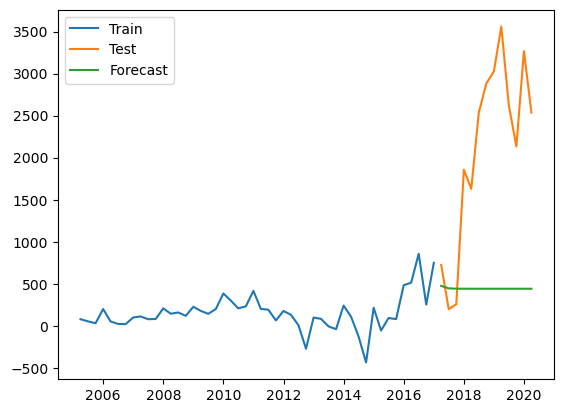

,MAE,MSE,RMSE,MAPE
"ARIMA(p=1,d=1,q=1)",1717.752907,3.875201e+06,1968.55299,0.810796


In [247]:
plot_res(train_net_income,test_net_income,fcast_arima_net_income)
arima_res = eval_model(test_net_income,fcast_arima_net_income,"ARIMA(p=1,d=1,q=1)")
arima_res

In [249]:
min_rmse_arima_net_income = 999999999999
pv_net_income=dv_net_income=qv_net_income = 0
c = 0
p_net_income = list(range(1,5))
d_net_income = list(range(1,3))
q_net_income = list(range(1,5))

for i in p_net_income:
    for j in d_net_income:
        for k in q_net_income:
            model = ARIMA(np.log(train_net_income),order=(i,j,k))
            arima_fit = model.fit()
            fcast = np.exp(arima_fit.forecast(len(test_net_income)))
            mse = mean_squared_error(test_net_income,fcast)
            rmse = np.sqrt(mse)
            c +=1
            print(f"For Iteration {c},p={i},d={j},q={k},RMSE={rmse}")
            if rmse <= min_rmse_arima_net_income:
                min_rmse_arima_net_income = rmse
                pv_net_income=i
                dv_net_income=j
                qv_net_income=k

For Iteration 1,p=1,d=1,q=1,RMSE=1968.552990399455
For Iteration 2,p=1,d=1,q=2,RMSE=1951.8595927206989
For Iteration 3,p=1,d=1,q=3,RMSE=1765.943757646146
For Iteration 4,p=1,d=1,q=4,RMSE=1687.5016493619148
For Iteration 5,p=1,d=2,q=1,RMSE=1608.2394643594278
For Iteration 6,p=1,d=2,q=2,RMSE=1716.9758650826457
For Iteration 7,p=1,d=2,q=3,RMSE=1687.5406103504888
For Iteration 8,p=1,d=2,q=4,RMSE=1802.2643645108408
For Iteration 9,p=2,d=1,q=1,RMSE=1853.78386626056
For Iteration 10,p=2,d=1,q=2,RMSE=1709.5203838083494
For Iteration 11,p=2,d=1,q=3,RMSE=1849.386779655472
For Iteration 12,p=2,d=1,q=4,RMSE=1809.1921517189958
For Iteration 13,p=2,d=2,q=1,RMSE=1485.4206297590124
For Iteration 14,p=2,d=2,q=2,RMSE=1534.376927910637
For Iteration 15,p=2,d=2,q=3,RMSE=1341.2422283117196
For Iteration 16,p=2,d=2,q=4,RMSE=1581.9306266310873
For Iteration 17,p=3,d=1,q=1,RMSE=1821.520028833051
For Iteration 18,p=3,d=1,q=2,RMSE=1867.9278177321546
For Iteration 19,p=3,d=1,q=3,RMSE=1755.032542483446
For Iterat

In [250]:
print("Minimum RMSE for ARIMA Net Income = ",min_rmse_arima_net_income)
print("p for Minimum RMSE Net Income = ",pv_net_income)
print("d for Minimum RMSE Net Income = ",dv_net_income)
print("q for Minimum RMSE Net Income = ",qv_net_income)

Minimum RMSE for ARIMA Net Income =  1171.7545215419811
p for Minimum RMSE Net Income =  3
d for Minimum RMSE Net Income =  2
q for Minimum RMSE Net Income =  3


## Final Model for Revnue and Net Income

* For Revenue ARIMA Model Performs well with best parameter (p=9,d=2,q=10)
* For Net Income Triple Exponential Smoothing performs well with best parameter (alpha=0.19,beta=0.5,gamma=0.02)

In [256]:
df_revenue.tail()

,Revenue (US $M)
Quarter,
2019-03-31,59700
2019-06-30,63404
2019-09-30,69981
2019-12-31,87437
2020-03-31,75452


In [253]:
df_net_income.head()

,Net Income (US $M)
Quarter,
2005-03-31,78
2005-06-30,52
2005-09-30,30
2005-12-31,199
2006-03-31,51


In [254]:
revenue_model = ARIMA(np.log(df_revenue),order=(9,2,10))
revenue_model_arima = revenue_model.fit()

In [255]:
revenue_model_arima.forecast(3)

2020-06-30    11.326134
2020-09-30    11.439860
2020-12-31    11.639406
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [259]:
net_income_model = ExponentialSmoothing(df_net_income,trend='add',seasonal='add',freq='Q')
net_income_model_tes = net_income_model.fit(smoothing_level=0.19,smoothing_trend=0.5,smoothing_seasonal=0.02)

In [260]:
net_income_model_tes.forecast(3)

2020-06-30    3617.267492
2020-09-30    3532.047944
2020-12-31    3949.026306
Freq: Q-DEC, dtype: float64

In [261]:
import pickle

In [264]:
with open("./models/revenue_model_arima.pkl", "wb") as file:
    pickle.dump(revenue_model_arima,file)

In [265]:
with open("./models/net_income_model_tes.pkl", "wb") as file:
    pickle.dump(net_income_model_tes,file)